<div align="right">
<p><img alt="UniAndes" height="150px" src="https://uniandes.edu.co/sites/default/files/logo-uniandes.png" align="left" hspace="30px" vspace="px"></p></div>
<div align="right">
<p><img alt="Posgrado" height="150px" src="https://media.licdn.com/dms/image/C5612AQHdDSooM0bFqg/article-inline_image-shrink_1000_1488/0/1608414780689?e=1698278400&v=beta&t=mGWsYQg3_7KeNpD247qMafOB3J3d7U8KTFdk8cKKP-k" align="right" hspace="50px" vspace="0px"></p></div>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<p>
<div align="center">
<h1> <b> Escuela de Posgrado </b>
<h1> <b> Departamento de Ingeniería de Sistemas y Computación </b>
<h1> <b> Maestría en Ingeniería de Información (MINE) </b> </h1>
<br>
<p>
<div align="left">
<h1> <b> Materia: MINE - 4101 Ciencia de datos Aplicada </b> </h1>
<h1> <b> Profesor: Fabian Camilo Peña </b> </h1>
<hr size=10 noshade color="yellow">
</p>
<p>
<h1> <b> Taller 2. Técnicas de Regresión lineal.
</b> </h1>
<br></br>
<div align="right">
<h1> <b> </b> </h1>
<h1> <b> Jenniffer Escudero Perdomo</b> </h1>
<h1> <b> Semestre: 2023 - 20</b> </h1>
<h1> <b> </b> </h1>
<h2> </h2>

<h1> <b> Fecha: Octubre 2023. </b> </h1> </p></div>

# **Objetivo**


El objetivo de este taller es evaluar las capacidades del estudiante para aplicar técnicas de regresión, las cuales permita descubrir insights y sugerir accionables al negocio.

No olvide realizar los ejercicios previos pertinentes respecto a la preparación y entendimiento de los datos.





#**Contexto de negocio: Apoyo del Banco Mundial a países en desarrollo.**
El Banco Mundial es una organización internacional que se dedica a brindar apoyo
financiero y técnico a países en desarrollo mediante préstamos para proyectos de
infraestructura, sectoriales, institucionales, entre otros, buscando mejorar el bienestar económico y social de su población.

El diseño de políticas de préstamos más informadas y adaptadas a las necesidades y realidades de cada país, no solo maximiza la probabilidad de
que los préstamos sean reembolsados en su totalidad, sino que también asegura que los fondos se utilicen de manera efectiva en las necesidades reales del territorio.

Históricamente, el Producto Interno Bruto (PIB) ha sido uno de los indicadores clave para evaluar la capacidad de pago de un país. Sin embargo, si bien existen reportes anuales del PIB de los países, aún no se entiende a la perfección con qué otros indicadores como tasa de empleo, acceso a internet, expectativa de vida, entre otros, se encuentra relacionado.

Como consultor científico de datos del Banco Mundial, se le ha dado la responsabilidad de desarrollar análisis que permitan dar respuesta a esta necesidad. Se le ha proporcionado un dataset construido por la organización Gapminder, quienes han hecho la labor de, a partir de múltiples fuentes, integrar indicadores por país para un periodo aproximado de tiempo.

Mediante el uso de modelos de regresión lineal, en conjunto con técnicas de preparación y exploración de datos, se espera que usted esté en capacidad de extraer y entender las relaciones que puedan existir entre el PIB de un país y otros indicadores disponibles.

# Configuración inicial

Primero se procede a hacer la importación de librerías para poder trabajar con los datos y poder realizar el análisis.

In [179]:
# librerias a instalar
!pip install pylev
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import statsmodels.api as sm
import os
import plotly.graph_objects as go
from scipy import stats
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures , OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# Para trazar figuras
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pylev # Distancia de Levenshtein
plt.rcParams['figure.dpi'] = 110
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# Configuración de pandas para extender el número de filas y columnas en la visualización
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)
# Deshabilitar warnings
import warnings
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)
# np.random.seed(42) # establecer la semilla del generador de números pseudoaleatorios de NumPy
from joblib import dump, load

# **Entendimiento y limpieza de datos**

Para el entendimiento de los datos se realizará caracterización de la data, así como la limpieza de datos, para tener un conjunto de datos que permita entrenar un modelo de regresión lineal.

# **Diccionario de datos**


Las  variables del conjunto de datos se describen a continuación

<h3>Variables</h3>|	<h3>Descripción</h3>|
---|---
country |Identificador único del país
incomeperperson|Producto Interno Bruto per cápita de 2010 en dólares estadounidenses constantes de 2000. Se ha tenido en cuenta la inflación pero no las diferencias en el coste de vida entre países.
alcconsumption|2008 Consumo de alcohol por adulto (mayores de 15 años), litros Consumo promedio de alcohol registrado y estimado, consumo per cápita de adultos (mayores de 15 años) en litros de alcohol puro
armedforcesrate|Personal de las fuerzas armadas (% de la fuerza laboral total)
breastcancerper100TH|2002 nuevos casos de cáncer de mama por cada 100.000 mujeres. Número de nuevos casos de cáncer de mama por cada 100.000 mujeres residentes durante un año determinado.
co2emissions|Emisiones acumuladas de CO2 en 2006 (toneladas métricas), Cantidad total de emisiones de CO2 en toneladas métricas desde 1751.
femaleemployrate|2007 empleadas mayores de 15 años (% de la población). Porcentaje de población femenina mayor de 15 años que ha estado empleada durante el año determinado.
HIVrate|% de prevalencia estimada del VIH de 2009 - (edades de 15 a 49 años). Número estimado de personas que viven con el VIH por cada 100 habitantes del grupo de edad de 15 a 49 años.
Internetuserate|2010 Usuarios de Internet (por cada 100 personas). Los usuarios de Internet son personas con acceso a la red mundial.
lifeexpectancy|2011 esperanza de vida al nacer (años). El número promedio de años que viviría un recién nacido si los patrones de mortalidad actuales se mantuvieran iguales.
oilperperson|2010 Consumo de petróleo per cápita (toneladas por año y persona).
polityscore|Puntaje de democracia (Polity) de 2009. Puntaje político general del conjunto de datos Polity IV, calculado restando un puntaje de autocracia de un puntaje de democracia. La medida resumida del carácter democrático y libre de un país. -10 es el valor más bajo, 10 el más alto.
relectricperperson |La cantidad de consumo de electricidad residencial por persona durante el año determinado, contada en kilovatios-hora (kWh).
suicideper100TH |Suicidio, ajustado por edad, por 100.000 Mortalidad por lesiones autoinfligidas, por 100.000 habitantes estándar, ajustado por edad.
employrate |2007 total de empleados mayores de 15 años (% de la población). Porcentaje del total de la población p, mayor de 15 años, que ha estado empleada durante el año determinado.
urbanrate |Población urbana (% del total) La población urbana se refiere a las personas que viven en áreas urbanas según lo definen las oficinas nacionales de estadística (calculadas utilizando estimaciones de población del Banco Mundial y proporciones urbanas de las Perspectivas de Urbanización Mundial de las Naciones Unidas).


  















# **Cargando los datos**



In [189]:
gapminder= pd.read_csv('./data/gapminder_final.csv')
gapminder.sample(10)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
158,Bhutan,1324.194906,0.54,NaN,21.8,6.024333e+06,39.900002,0.20,13.598876,67.185,NaN,3.0,NaN,15.542603,58.400002,34.48
111,Sudan,523.950151,2.56,0.969499,22.5,2.250197e+08,27.900000,1.10,NaN,61.452,NaN,-4.0,50.892101,9.709556,47.299999,43.44
62,Bangladesh,558.062877,0.17,0.287892,16.6,5.987740e+08,53.599998,0.06,3.700003,68.944,0.032281,5.0,68.115229,14.538357,68.099998,27.14
146,Libya,7885.468037,0.10,3.311674,23.4,1.414032e+09,23.200001,NaN,14.000247,74.788,NaN,-7.0,846.014923,4.667025,48.599998,77.54
34,Gabon,4180.765821,9.46,1.018906,18.2,1.708043e+08,52.599998,5.20,7.232224,62.703,NaN,3.0,537.104738,7.745065,59.000000,85.04
114,Tajikistan,279.180453,3.39,0.604873,13.2,1.041700e+08,50.099998,0.20,11.549391,67.529,NaN,-3.0,405.775385,2.648981,54.599998,26.46
74,"Macedonia, FYR",2221.185664,8.94,2.101467,52.1,1.688830e+08,26.799999,NaN,51.914184,74.847,NaN,9.0,NaN,7.876878,34.900002,66.90
138,Uruguay,9106.327234,8.99,1.579341,83.1,2.757443e+08,46.000000,0.50,47.867469,77.005,NaN,10.0,823.823197,14.537270,57.500000,92.30
72,Kyrgyzstan,372.728414,4.72,0.837768,23.0,8.797067e+07,48.799999,0.30,19.582316,67.714,NaN,1.0,428.312307,9.875281,58.900002,36.28
61,Senegal,561.708585,0.51,0.362261,18.4,1.271087e+08,56.900002,0.90,15.999650,59.318,NaN,7.0,55.794744,6.811439,65.599998,42.38


Se determinan las dimensiones de la base de datos, es decir, se realiza el conteo de registros (Filas) y variables (Columnas), así como el tipo de datos, tipo de variables de cada una de ellas, el porcentaje de datos nulos por variable.

In [12]:
def caracteristicas_dtf(name):
    print(f"Las dimensiones del conjunto de datos son: {name.shape}, correspondiente a {name.shape[0]} registros y {name.shape[1]} columnas (variables)")
    print()
    print("El listado de variables para el conjunto de datos es:")
    print(name.keys())
    print()
    print("Los tipos de variable leído del conjunto de datos son:")
    print()
    print(name.info())
    print()
    print("La cantidad de valores únicos y porcentaje de nulidad por variable son:")
    print()
    for col in name.columns:
        print(f"{col} - tiene {name[col].nunique()} valores únicos, {name[col].isnull().sum()} valores vacios correspondiente a {round(np.mean(name[col].isnull())*100)}% de datos nulos")
    print()
    print(f"El conjunto de datos tiene {name.duplicated().sum()} registros (filas) duplicados.")
    print()
    duplicados = name[name.duplicated()].iloc[:,:4]
    print(duplicados)


In [13]:
caracteristicas_dtf(gapminder)

Las dimensiones del conjunto de datos son: (178, 16), correspondiente a 178 registros y 16 columnas (variables)

El listado de variables para el conjunto de datos es:
Index(['country', 'incomeperperson', 'alcconsumption', 'armedforcesrate',
       'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate',
       'internetuserate', 'lifeexpectancy', 'oilperperson', 'polityscore',
       'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate'],
      dtype='object')

Los tipos de variable leído del conjunto de datos son:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               178 non-null    object 
 1   incomeperperson       175 non-null    float64
 2   alcconsumption        178 non-null    float64
 3   armedforcesrate       174 non-null    float64
 4   breastcancerper100th  177 non-null 

De una primera observación general de los datos se puede identificar:

- Se tienen 16 columnas y 178 registros.
- Se tienen 2 tipos de datos:  float64(15), object(1), lo cual indica que la variables son leidas acorde con su tipo de variable.
- Se tienen 12 registros duplicados los cuales deben ser eliminados del dataset
- Las siguientes variables tienen la mayor cantidad de datos incompletos:

 - hivrate - tiene 46 valores únicos, 23 valores vacios correspondiente a 13% de datos nulos
 - oilperperson - tiene 61 valores únicos, 111 valores vacios correspondiente a 62% de datos nulos
 - polityscore - tiene 21 valores únicos, 11 valores vacios correspondiente a 6% de datos nulos
 - relectricperperson - tiene 129 valores únicos, 37 valores vacios correspondiente a 21% de datos nulos.

Lo que se considera que son muchos nulos y se debe hacer un tratamiento de imputación si se han de incluir en las variables del modelo.

In [ ]:
def valores_unicos_dtf(name):
    for col in name.columns:
        print(f'La variable {col} tiene {name[col].nunique()} valores únicos.')
        print()
        print(name[col].unique())
        print(end="\n")

In [ ]:
valores_unicos_dtf(gapminder)

# **Análisis univariado de variables.**

### Variables categóricas

Como se evidencio que hay registros repetidos se procede a eliminarlos del data set asi como los registros nulos de la variable de interes "incomeperperson" para poder analizar las variables por lo que el conjunto de datos ahora es de 163 filas y 16 columnas.

In [191]:
gapminder = gapminder.dropna(subset=["incomeperperson"])

In [192]:
gapminder=gapminder.drop_duplicates()
gapminder.shape

(163, 16)

In [ ]:
# Función
def plotBar(s_Serie,s_title,s_orientation='v', color='color'):
  df_chart = s_Serie.value_counts(normalize=True).round(5)*100
  print (df_chart)
  if (s_orientation=='h'):
    return go.Figure(go.Bar(
      y = df_chart.index, x = df_chart.values, orientation = s_orientation,  marker_color = color
    )).update_layout(title=s_title)
  return go.Figure(go.Bar(
      x = df_chart.index, y = df_chart.values, orientation = 'v',  marker_color = color
  )).update_layout(title=s_title)

In [ ]:
plotBar(gapminder.country,'Paises',s_orientation='v',color='darkblue')

Por lo que podemos indicar que cada registro pertenece a un país.

Variables numéricas

In [26]:
varNumeric=gapminder.describe()
print(varNumeric)

       incomeperperson  alcconsumption  armedforcesrate  breastcancerper100th  \
count       163.000000      163.000000       159.000000            162.000000   
mean       7202.019107        6.782086         1.359446             37.656790   
std       10469.295971        4.995312         1.528647             23.189042   
min         103.775857        0.050000         0.000000              3.900000   
25%         602.502870        2.625000         0.468250             20.600000   
50%        2344.896916        6.080000         0.904025             29.900000   
75%        8550.031767        9.870000         1.544014             50.250000   
max       52301.587180       23.010000         9.820127            101.100000   

       co2emissions  femaleemployrate     hivrate  internetuserate  \
count  1.610000e+02        162.000000  143.000000       161.000000   
mean   6.156077e+09         48.001234    1.979371        33.809838   
std    2.855923e+10         14.731864    4.429626        28.

In [17]:
#histograma para ver la distribución plot_hist
def plot_hist(data, x_value, title, bins=None):
    if(bins != None):
        plt = sns.histplot(data=data, x=x_value,bins=bins)
    else:
        plt = sns.histplot(data=data, x=x_value)

    plt.set_title(title, fontsize=14, fontweight='bold')

    # delete axis lines
    plt.spines['top'].set_visible(False)
    plt.spines['right'].set_visible(False)

    plt.tick_params(bottom=False, left=False)

In [18]:
def plot_box(data, x_label, title):
    # Create a new figure with a horizontal boxplot
    f, ax = plt.subplots(figsize=(20, 3))
    sns.boxplot(data=data, orient="h", color="orange", ax=ax)

    ax.set_title(title, fontsize=14, fontweight='bold')

    # Delete axis lines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.tick_params(bottom=False, left=False)

    ax.set(xlabel=x_label)

    # Remove label for y-axis
    ax.set_yticklabels("")


Incomeperperson.

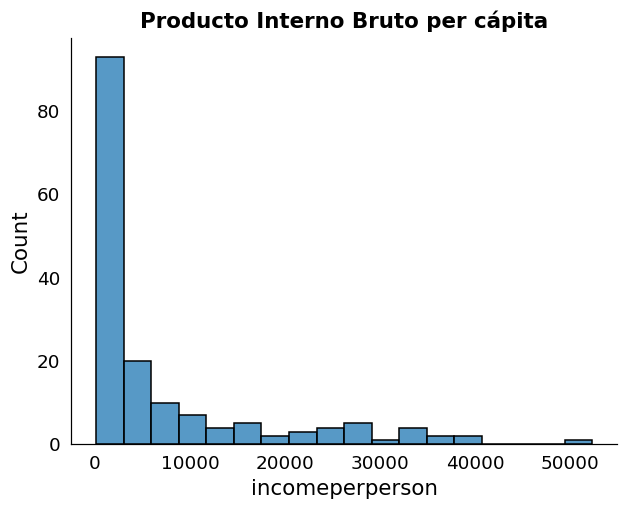

In [19]:
plot_hist(gapminder, "incomeperperson", "Producto Interno Bruto per cápita" ,bins=None)

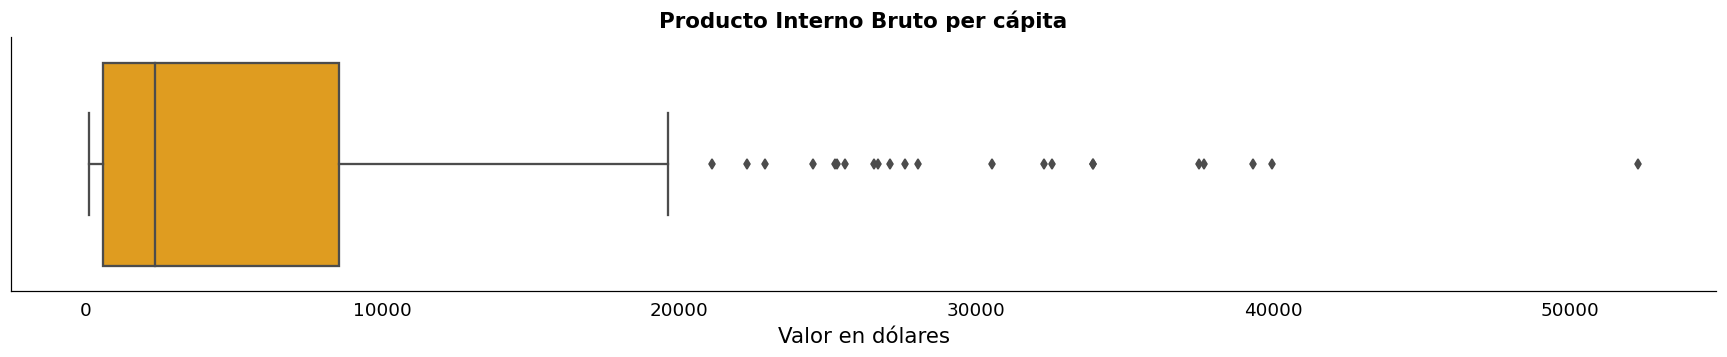

In [20]:
plot_box(gapminder["incomeperperson"], 'Valor en dólares','Producto Interno Bruto per cápita')

El valor de producto interno bruto para los paises se observan valores atípicos.

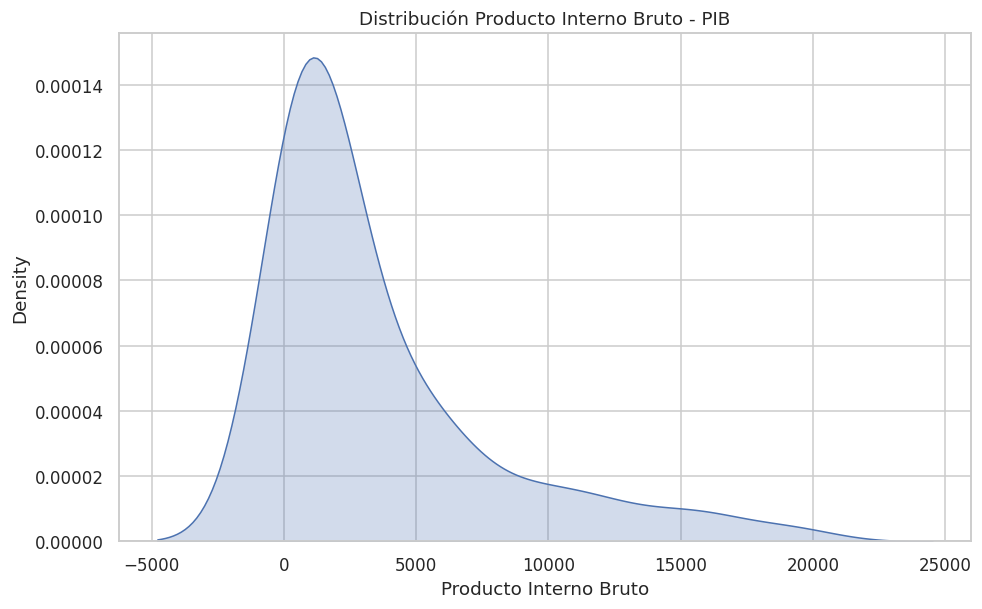

In [21]:
#  Distribución eliminando outlier
q1 = gapminder["incomeperperson"].quantile(0.25)
q3 = gapminder["incomeperperson"].quantile(0.75)
iqr = q3 - q1

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
sns.kdeplot(data=gapminder.loc[gapminder["incomeperperson"] <= (q3 + 1.5 * iqr)]["incomeperperson"], fill=True)
plt.xlabel('Producto Interno Bruto')
plt.ylabel('Density')
plt.title('Distribución Producto Interno Bruto - PIB')
plt.show()

alcconsumption

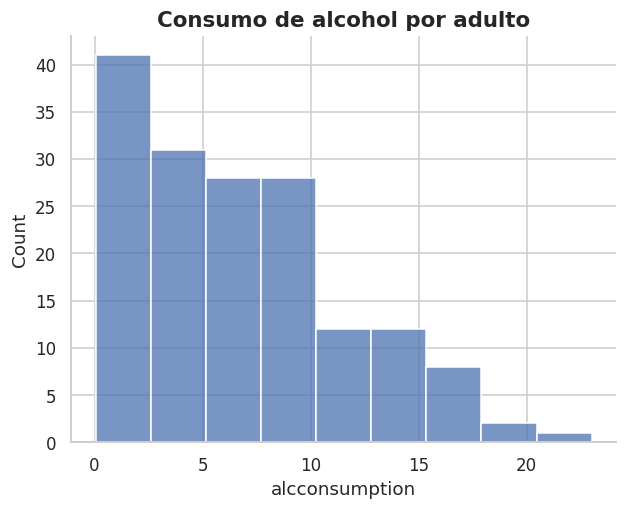

In [22]:
plot_hist(gapminder, "alcconsumption", "Consumo de alcohol por adulto" ,bins=None)

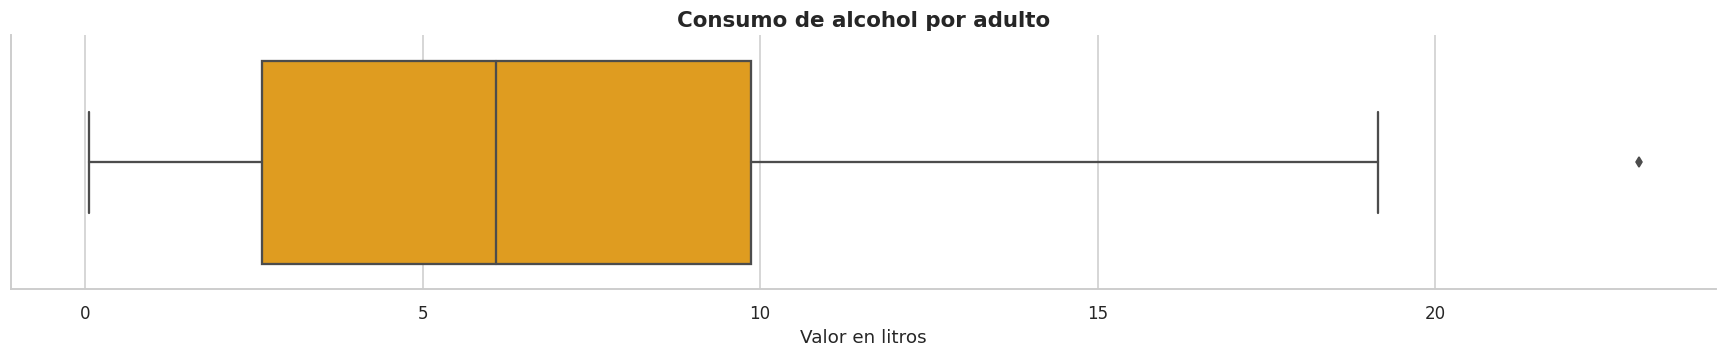

In [23]:
plot_box(gapminder["alcconsumption"], 'Valor en litros',"Consumo de alcohol por adulto")

Respecto a la variable 'alcconsumption', se evidencian pocos datos atipicos.

armedforcesrate

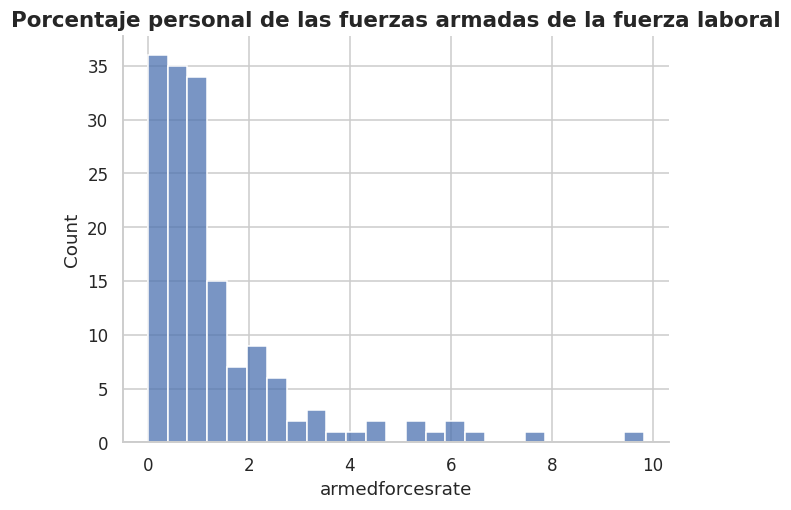

In [24]:
plot_hist(gapminder, "armedforcesrate", "Porcentaje personal de las fuerzas armadas de la fuerza laboral" ,bins=None)

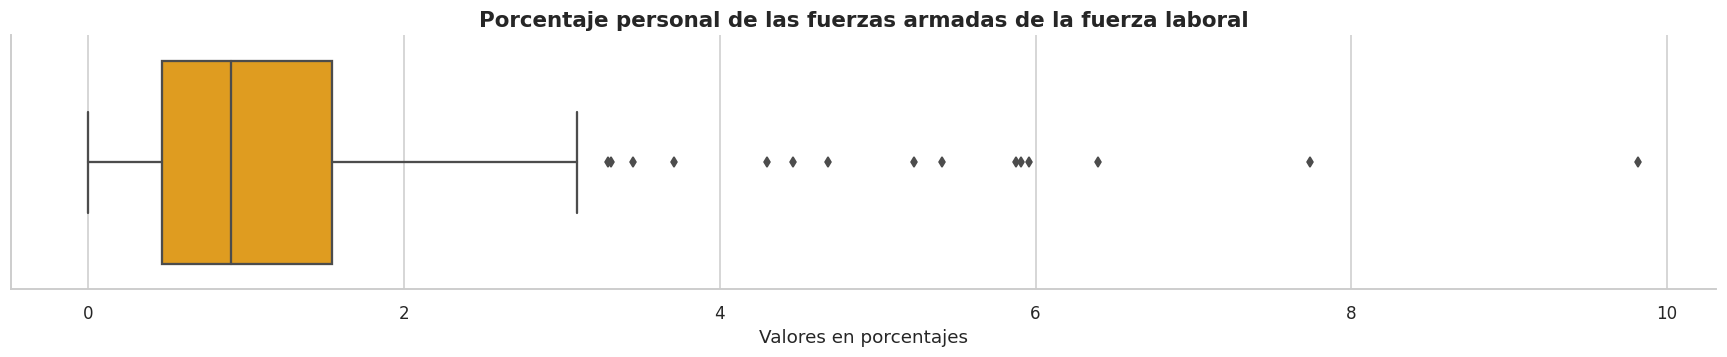

In [25]:
plot_box(gapminder["armedforcesrate"], 'Valores en porcentajes' ,"Porcentaje personal de las fuerzas armadas de la fuerza laboral")

Para la variable armedforcesrate se observan datos atipicos, dado que el percentil 75% corresponde a  1.54 y se evidencian valores por encima de este valor con máximo de  9.820127

breastcancerper100th

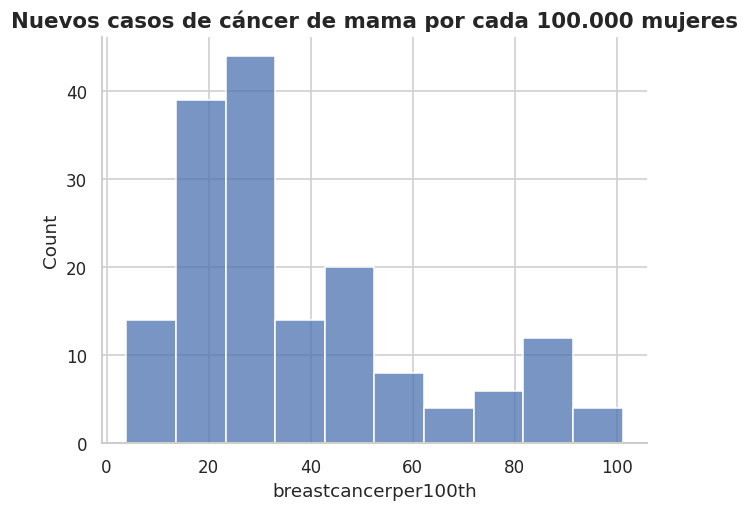

In [ ]:
plot_hist(gapminder, "breastcancerper100th", "Nuevos casos de cáncer de mama por cada 100.000 mujeres" ,bins=None)

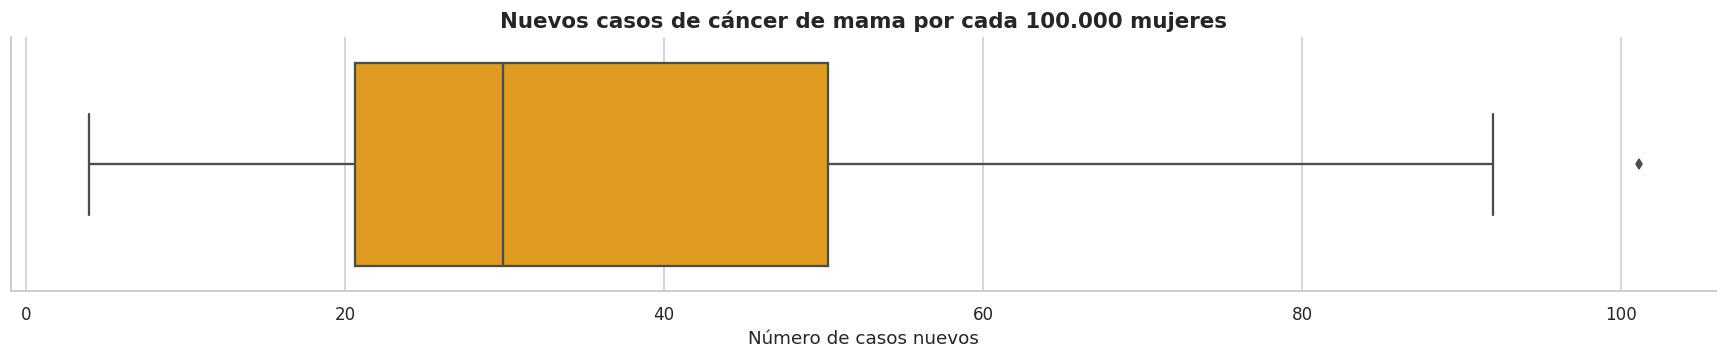

In [27]:
plot_box(gapminder["breastcancerper100th"], "Número de casos nuevos", "Nuevos casos de cáncer de mama por cada 100.000 mujeres")

No se presenta mucha atipicidad en los paises para la tasa de cancer de mama.

co2emissions

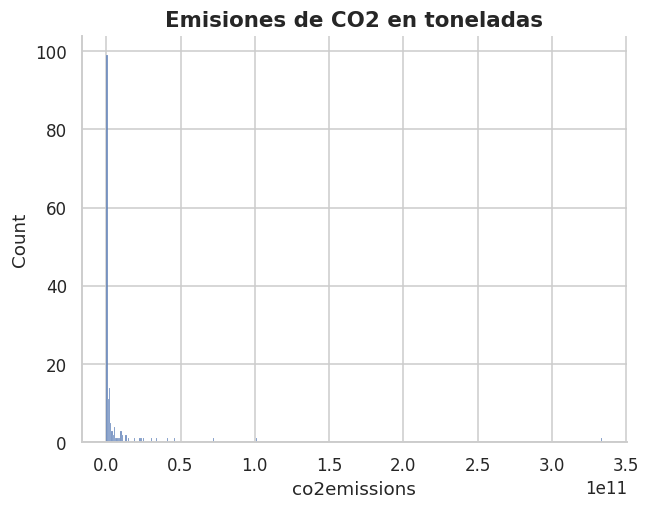

In [28]:
plot_hist(gapminder, "co2emissions", "Emisiones de CO2 en toneladas" ,bins=None)

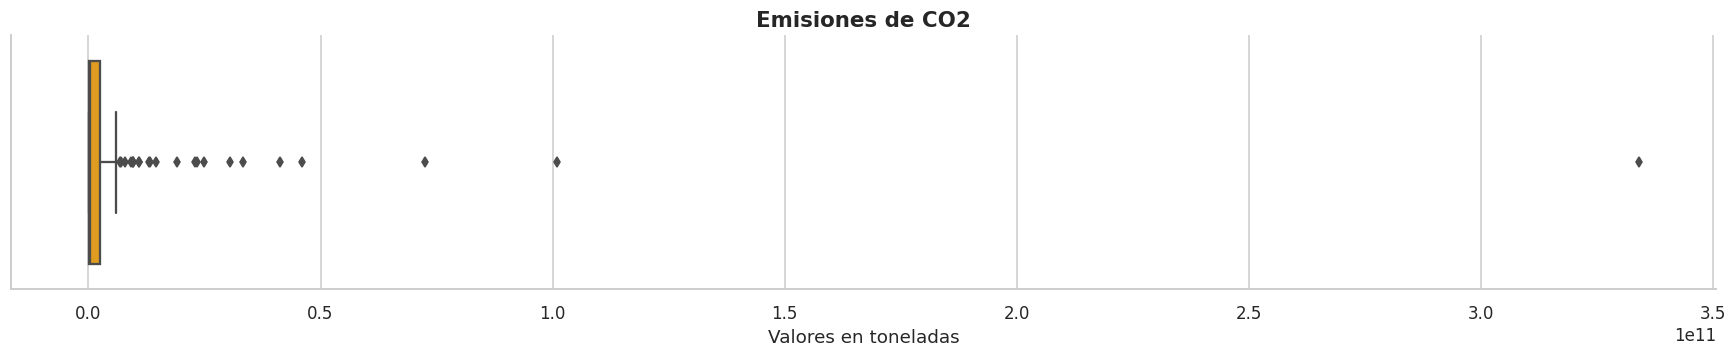

In [29]:
plot_box(gapminder["co2emissions"],"Valores en toneladas" ,"Emisiones de CO2")

femaleemployrate

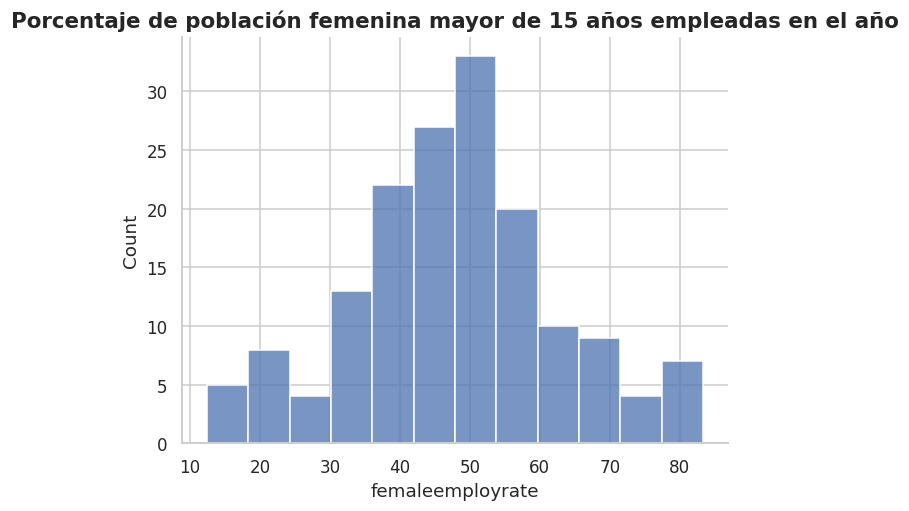

In [30]:
plot_hist(gapminder, "femaleemployrate", "Porcentaje de población femenina mayor de 15 años empleadas en el año" ,bins=None)

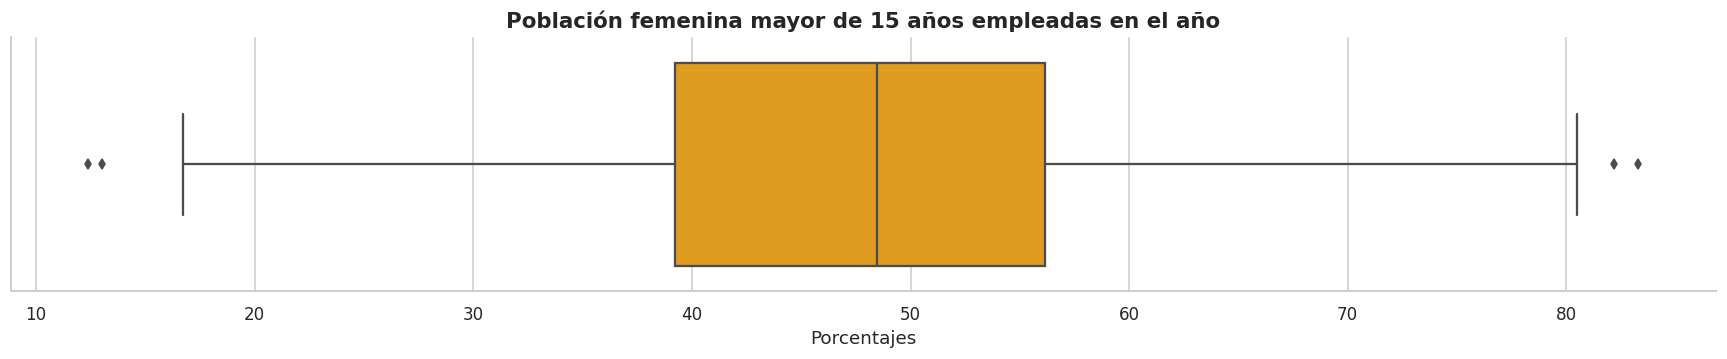

In [31]:
plot_box(gapminder["femaleemployrate"], "Porcentajes", "Población femenina mayor de 15 años empleadas en el año")

In [32]:
#maximo=gapminder['femaleemployrate'].max()
q1=gapminder['femaleemployrate'].quantile(0.25)
q3=gapminder['femaleemployrate'].quantile(0.75)
iqr=q3-q1
limiteinf = q1 - 1.5 * iqr
limitesup= q3 + 1.5 * iqr
print(limitesup)
gapminder[(gapminder['femaleemployrate'] > limitesup) | (gapminder['femaleemployrate'] < limiteinf)][['country', 'femaleemployrate']].sort_values(by='femaleemployrate', ascending=False)
#gapminder[(gapminder['femaleemployrate'] > limitesup | (gapminder['femaleemployrate'] < limiteinf)][['country', 'femaleemployrate']].sort_values(by='femaleemployrate', ascending=False)

81.49999999625001


,country,femaleemployrate
77,Burundi,83.300003
43,Mozambique,82.199997
144,Jordan,13.000000
13,Iraq,12.400000


 Se encuentran valores atípicos correspondientes a los países de Burundi y Mozambique en los que el porcentaje de mujeres de más de 15 años ha estado empleada es de 83% y 82% respectivamente, es decir que hay un alto porcentaje de mujeres menores de edad trabajando.


hivrate

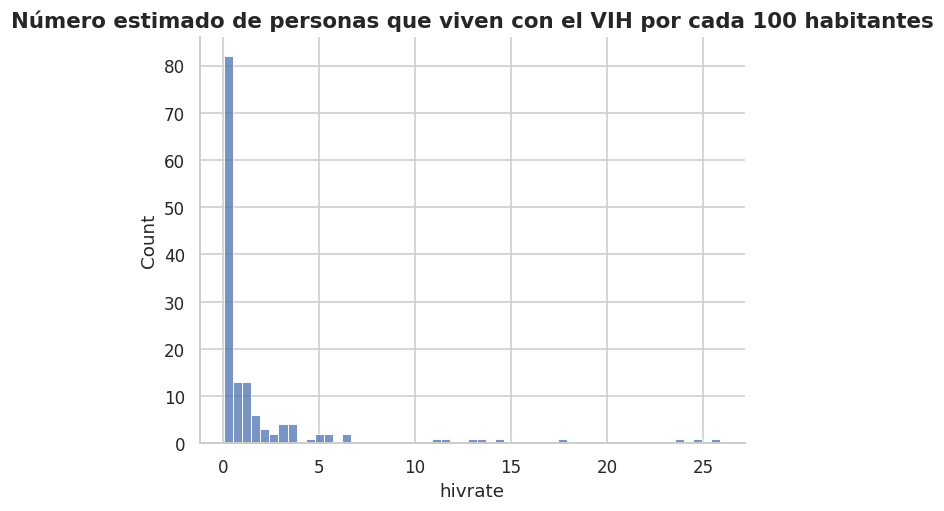

In [33]:
plot_hist(gapminder, "hivrate", "Número estimado de personas que viven con el VIH por cada 100 habitantes" ,bins=None)

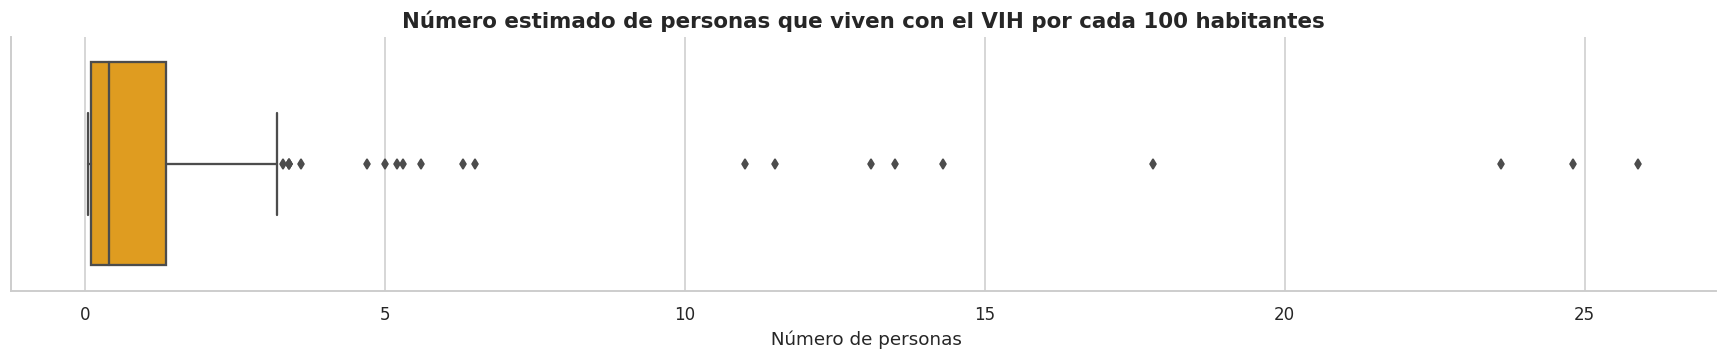

In [34]:
plot_box(gapminder["hivrate"]," Número de personas", "Número estimado de personas que viven con el VIH por cada 100 habitantes" )

In [35]:
q3=gapminder['hivrate'].quantile(0.75)
print(q3)
gapminder[(gapminder['hivrate'] > q3) ][['country', 'hivrate','lifeexpectancy']].sort_values(by='hivrate', ascending=False)

1.35


,country,hivrate,lifeexpectancy
56,Swaziland,25.9,48.718
90,Botswana,24.8,53.183
28,Lesotho,23.6,48.196
33,South Africa,17.8,52.797
86,Zimbabwe,14.3,51.384
147,Zambia,13.5,49.025
175,Namibia,13.1,62.465
43,Mozambique,11.5,50.239
139,Malawi,11.0,54.210
31,Uganda,6.5,54.116


Para la variable hivrate la tasa de personas que viven con VIH que se consideran atípicos corresponden a países con esperanza de vida VIH de 48 años o más lo cual puede indicar que los datos no son errores de digitación.


intnernetuserate

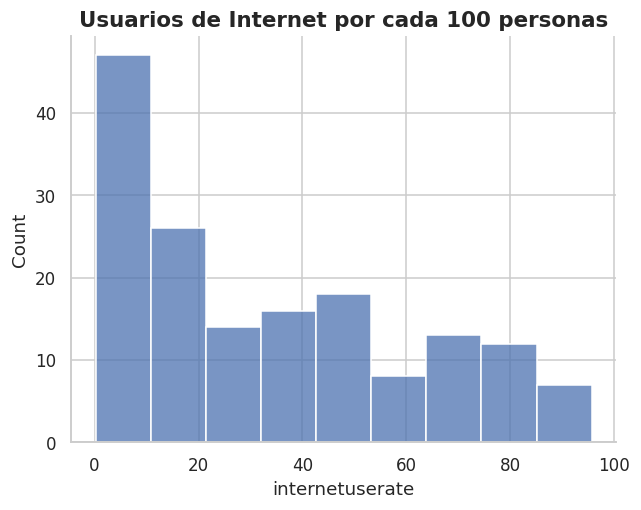

In [36]:
plot_hist(gapminder, "internetuserate", "Usuarios de Internet por cada 100 personas" ,bins=None)

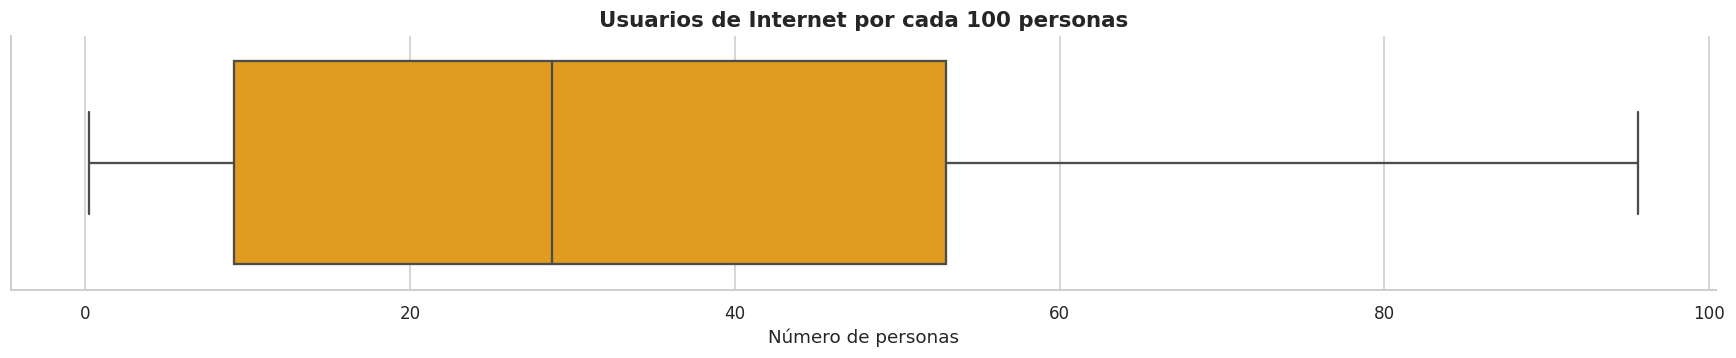

In [37]:
plot_box(gapminder["internetuserate"], "Número de personas","Usuarios de Internet por cada 100 personas")

La variable no presenta valores atípicos. Se observa que los usuarios de internet por país estan entre 0.21 y 95.63 por cada 100 personas

lifeexpectancy

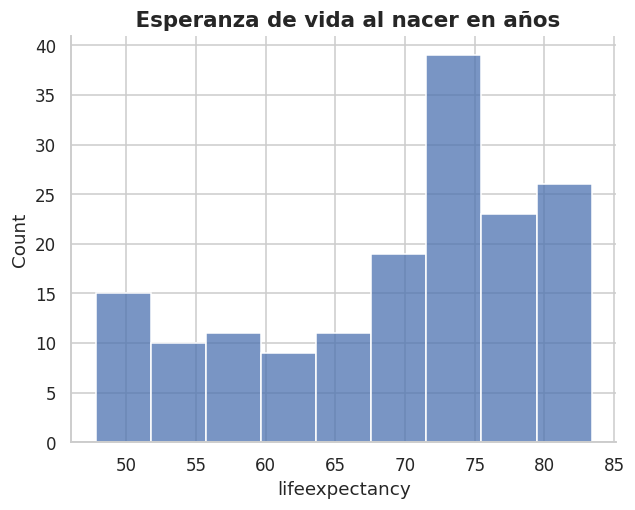

In [38]:
plot_hist(gapminder, "lifeexpectancy", " Esperanza de vida al nacer en años" ,bins=None)

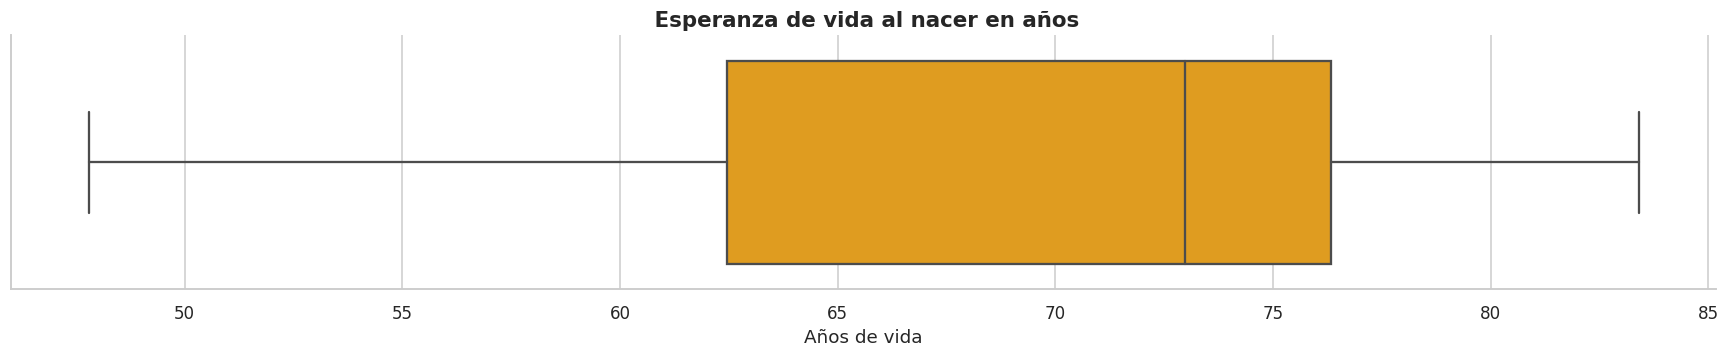

In [39]:
plot_box(gapminder["lifeexpectancy"],"Años de vida", " Esperanza de vida al nacer en años" )


La esperanza de vida no presenta valores atipicos, teniendo como promedio aproximado de vida esperado de 69 años y maximo alrededor de 83 años.

oilperperson

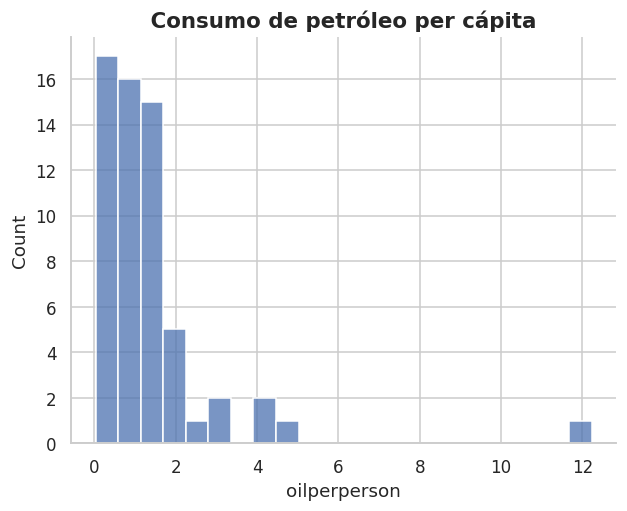

In [40]:
plot_hist(gapminder, "oilperperson", " Consumo de petróleo per cápita " ,bins=None)

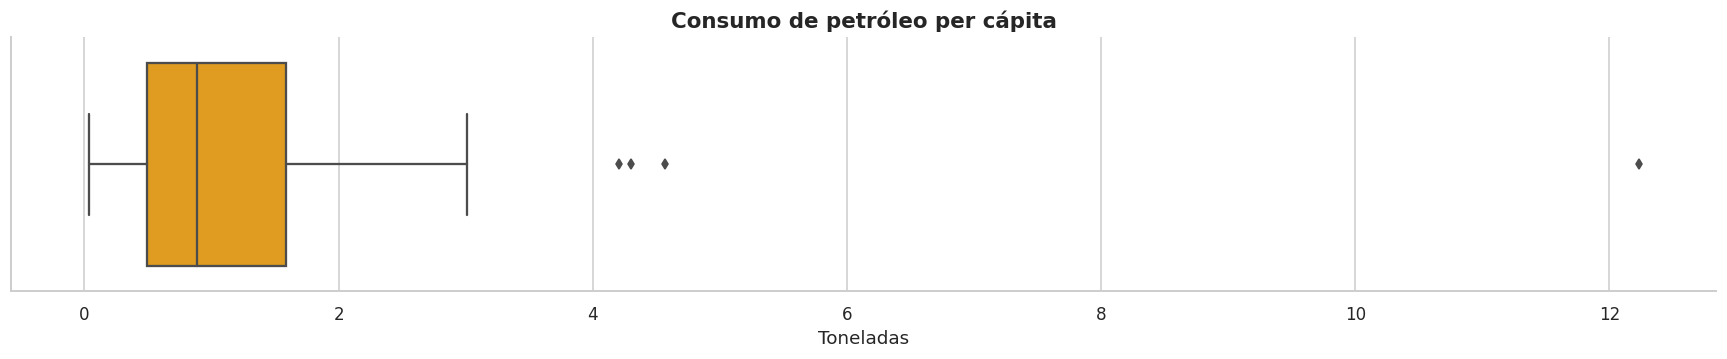

In [41]:
plot_box(gapminder["oilperperson"], "Toneladas","Consumo de petróleo per cápita" )

In [42]:
q3=gapminder['oilperperson'].quantile(0.75)
print(q3)
gapminder[(gapminder['oilperperson'] > q3) ][['country', 'oilperperson']].sort_values(by='oilperperson', ascending=False)

1.5830217325


,country,oilperperson
117,Singapore,12.228645
26,Saudi Arabia,4.572268
159,United Arab Emirates,4.299964
160,Qatar,4.207431
170,Canada,3.007356
165,Netherlands,2.997655
177,United States,2.738544
44,Norway,2.191226
23,"Korea, Rep.",2.087848
60,Finland,1.938654


Se puede indicar que existen países que al año consumen más de 4 toneladas de petróleo, lo cual es gran consumo teniendo en cuenta que la media de consumo por año que es de 1.5 toneladas, se considera que hay valores muy atípicos.

polityscore

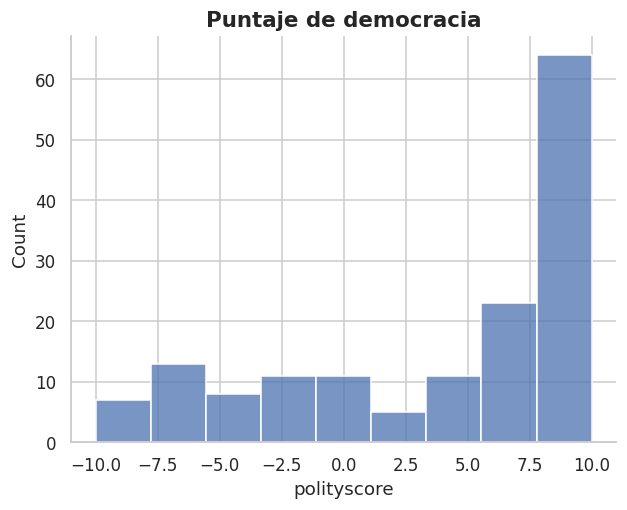

In [43]:
plot_hist(gapminder, "polityscore", "Puntaje de democracia" ,bins=None)

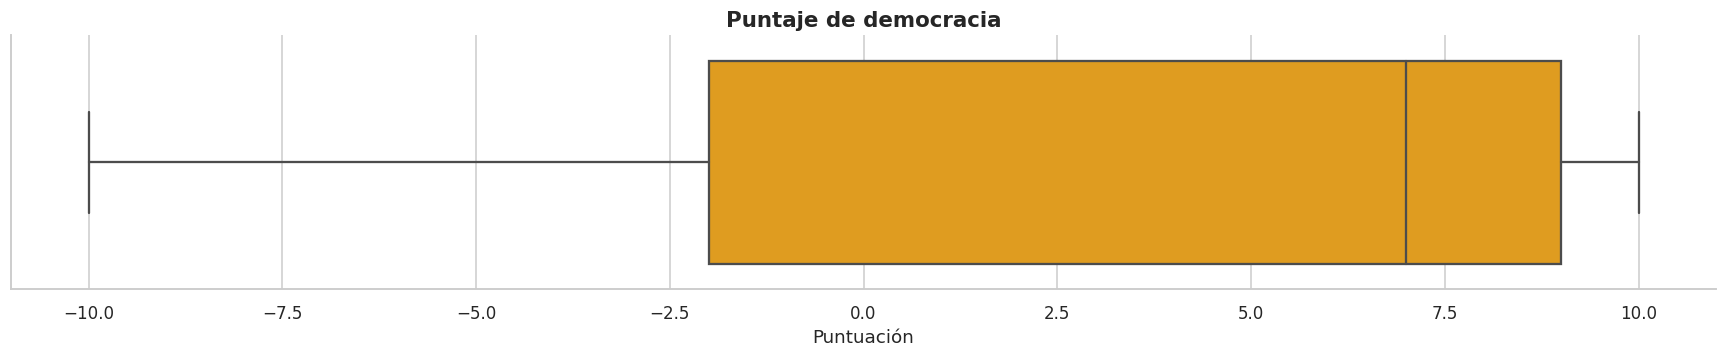

In [44]:
plot_box(gapminder["polityscore"],"Puntuación", "Puntaje de democracia")

La variable no presenta valores atipicos a considerar

relectricperperson

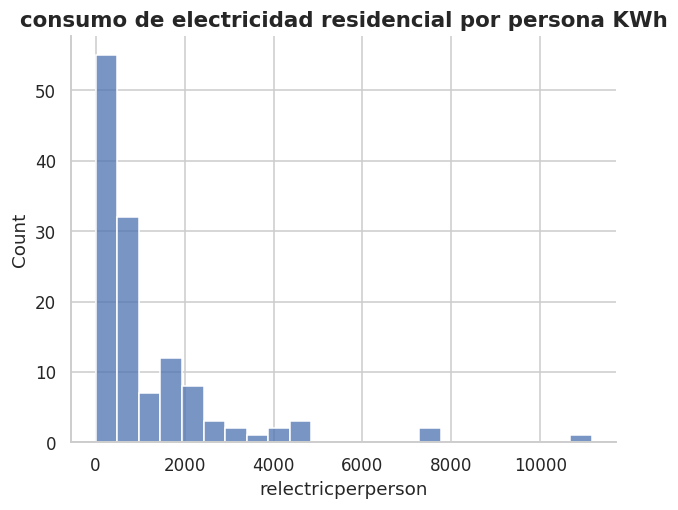

In [45]:
plot_hist(gapminder, "relectricperperson", "consumo de electricidad residencial por persona KWh" ,bins=None)

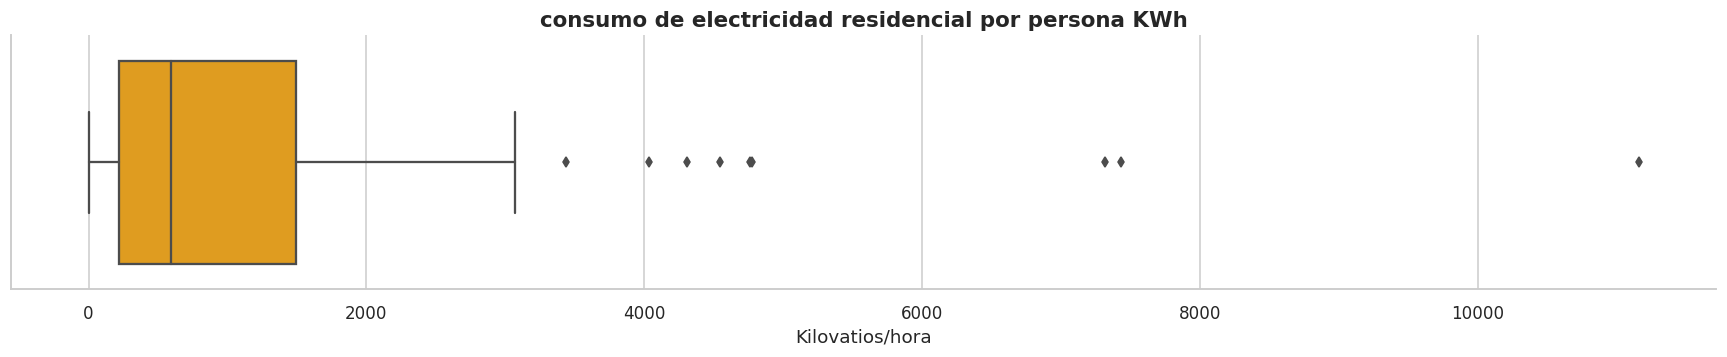

In [46]:
plot_box(gapminder["relectricperperson"],"Kilovatios/hora", "consumo de electricidad residencial por persona KWh")

In [47]:
q3=gapminder['relectricperperson'].quantile(0.75)
print(q3)
gapminder[(gapminder['relectricperperson'] > q3) ][['country', 'relectricperperson']].sort_values(by='relectricperperson', ascending=False)

1491.14524875


,country,relectricperperson
159,United Arab Emirates,11154.755030
44,Norway,7432.130852
136,Bahrain,7314.355637
170,Canada,4772.370648
160,Qatar,4759.453844
177,United States,4542.848695
137,Sweden,4304.514402
60,Finland,4036.953993
26,Saudi Arabia,3433.932449
133,Brunei,3067.498901


El consumo de kilovatios hora por país presenta unas atipicidades a considerar.

suicideper100th

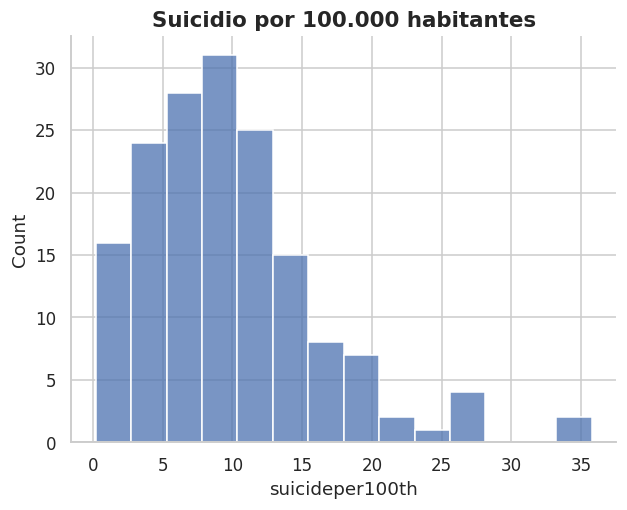

In [48]:
plot_hist(gapminder, "suicideper100th", "Suicidio por 100.000 habitantes" ,bins=None)

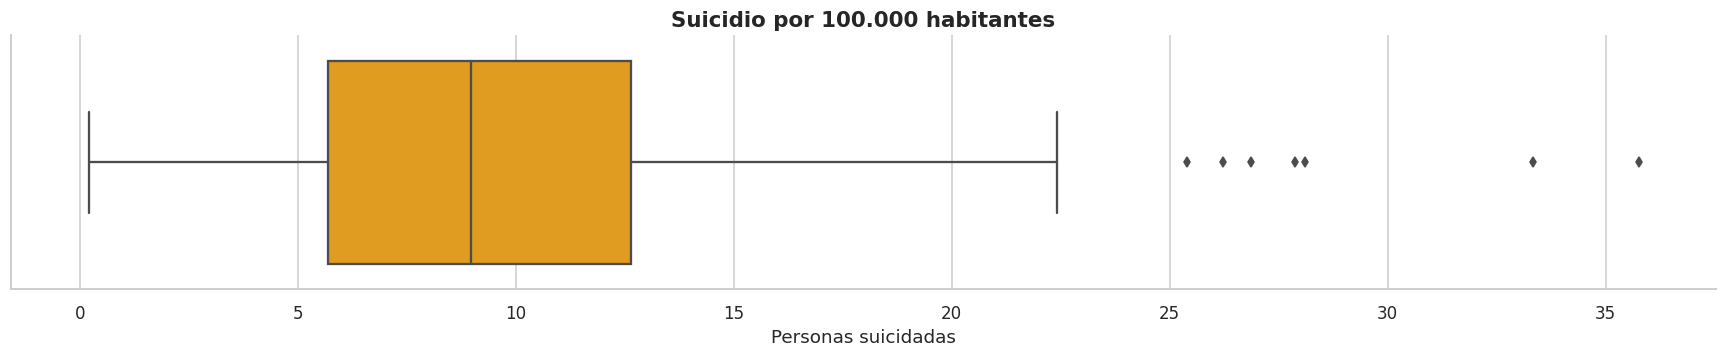

In [49]:
plot_box(gapminder["suicideper100th"],"Personas suicidadas", "Suicidio por 100.000 habitantes")

In [50]:
q3=gapminder['suicideper100th'].quantile(0.75)
print(q3)
gapminder[(gapminder['suicideper100th'] > q3) ][['country', 'suicideper100th']].sort_values(by='suicideper100th', ascending=False)

12.64049816


,country,suicideper100th
63,Guyana,35.752872
25,Lithuania,33.341860
154,Sri Lanka,28.104046
65,Russia,27.874160
27,Belarus,26.874690
171,Laos,26.219198
112,Kazakhstan,25.404600
23,"Korea, Rep.",22.404560
40,Suriname,20.747431
172,Latvia,20.369590


Existen países en las que el suicidio es alto dado que el valor promedio de suicido por cada 100 mil habitantes es de 9.825928 personas y se evidencian países con tasas de suicidio de 25.5 y más.
No se observa que los países con valores atípicos sea un error de digitación


employrate

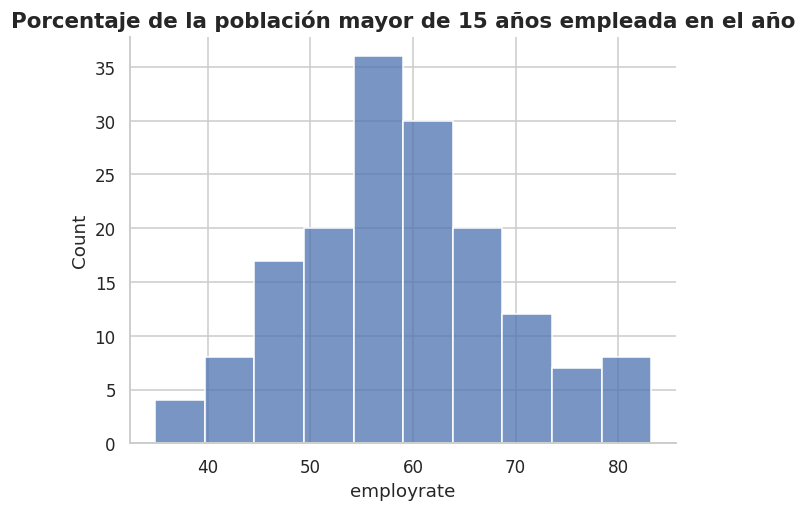

In [51]:
plot_hist(gapminder, "employrate", "Porcentaje de la población mayor de 15 años empleada en el año" ,bins=None)

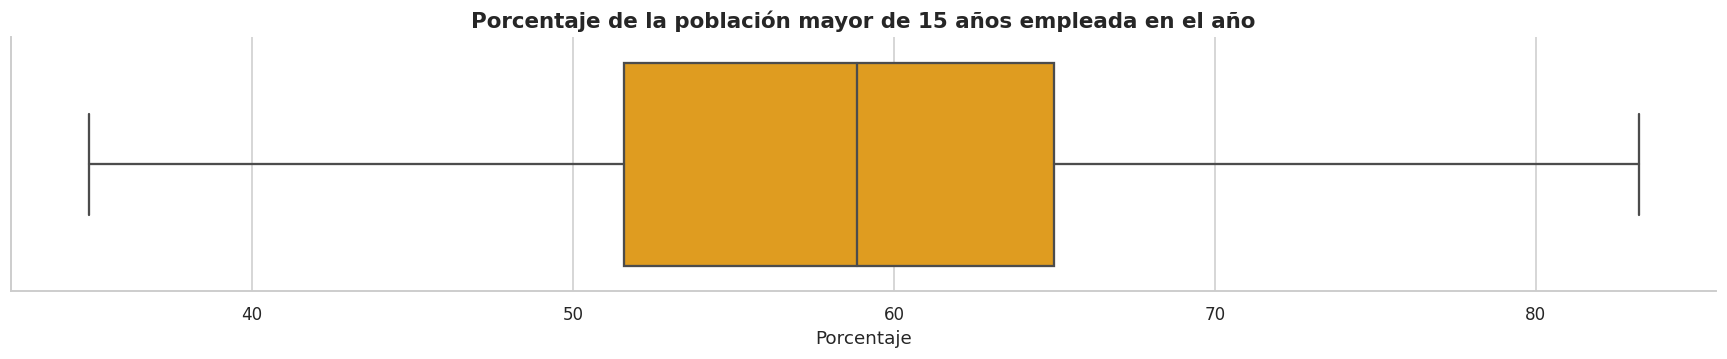

In [52]:
plot_box(gapminder["employrate"],"Porcentaje", "Porcentaje de la población mayor de 15 años empleada en el año")

Para la variable employrate no se observan problemas de valores atípicos.

urbanrate

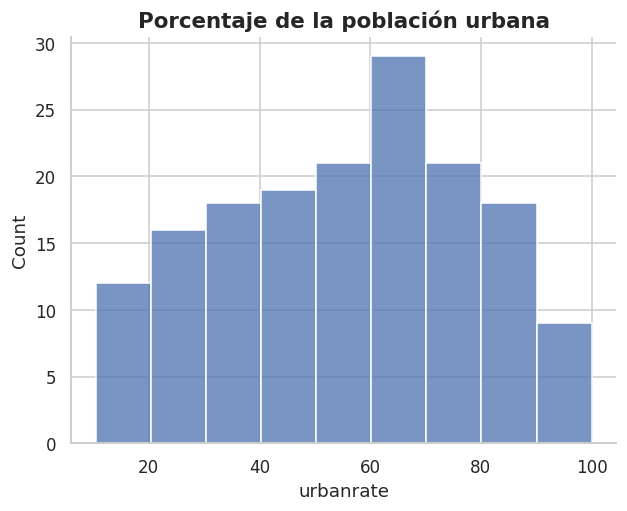

In [53]:
plot_hist(gapminder, "urbanrate", "Porcentaje de la población urbana" ,bins=None)

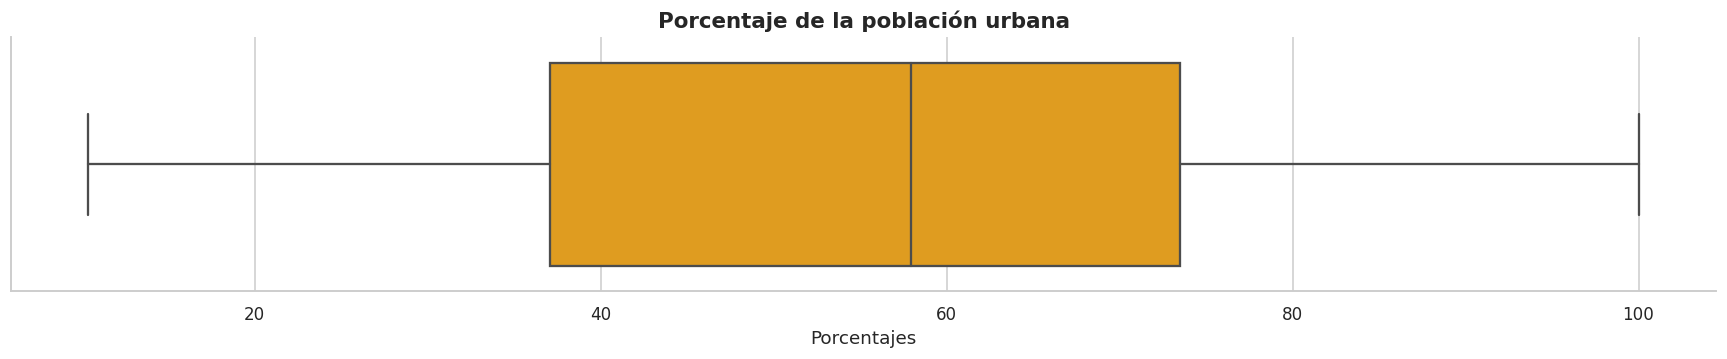

In [54]:
plot_box(gapminder["urbanrate"],"Porcentajes", "Porcentaje de la población urbana")

Para la variable urbanrate no se observan problemas de valores atípicos.

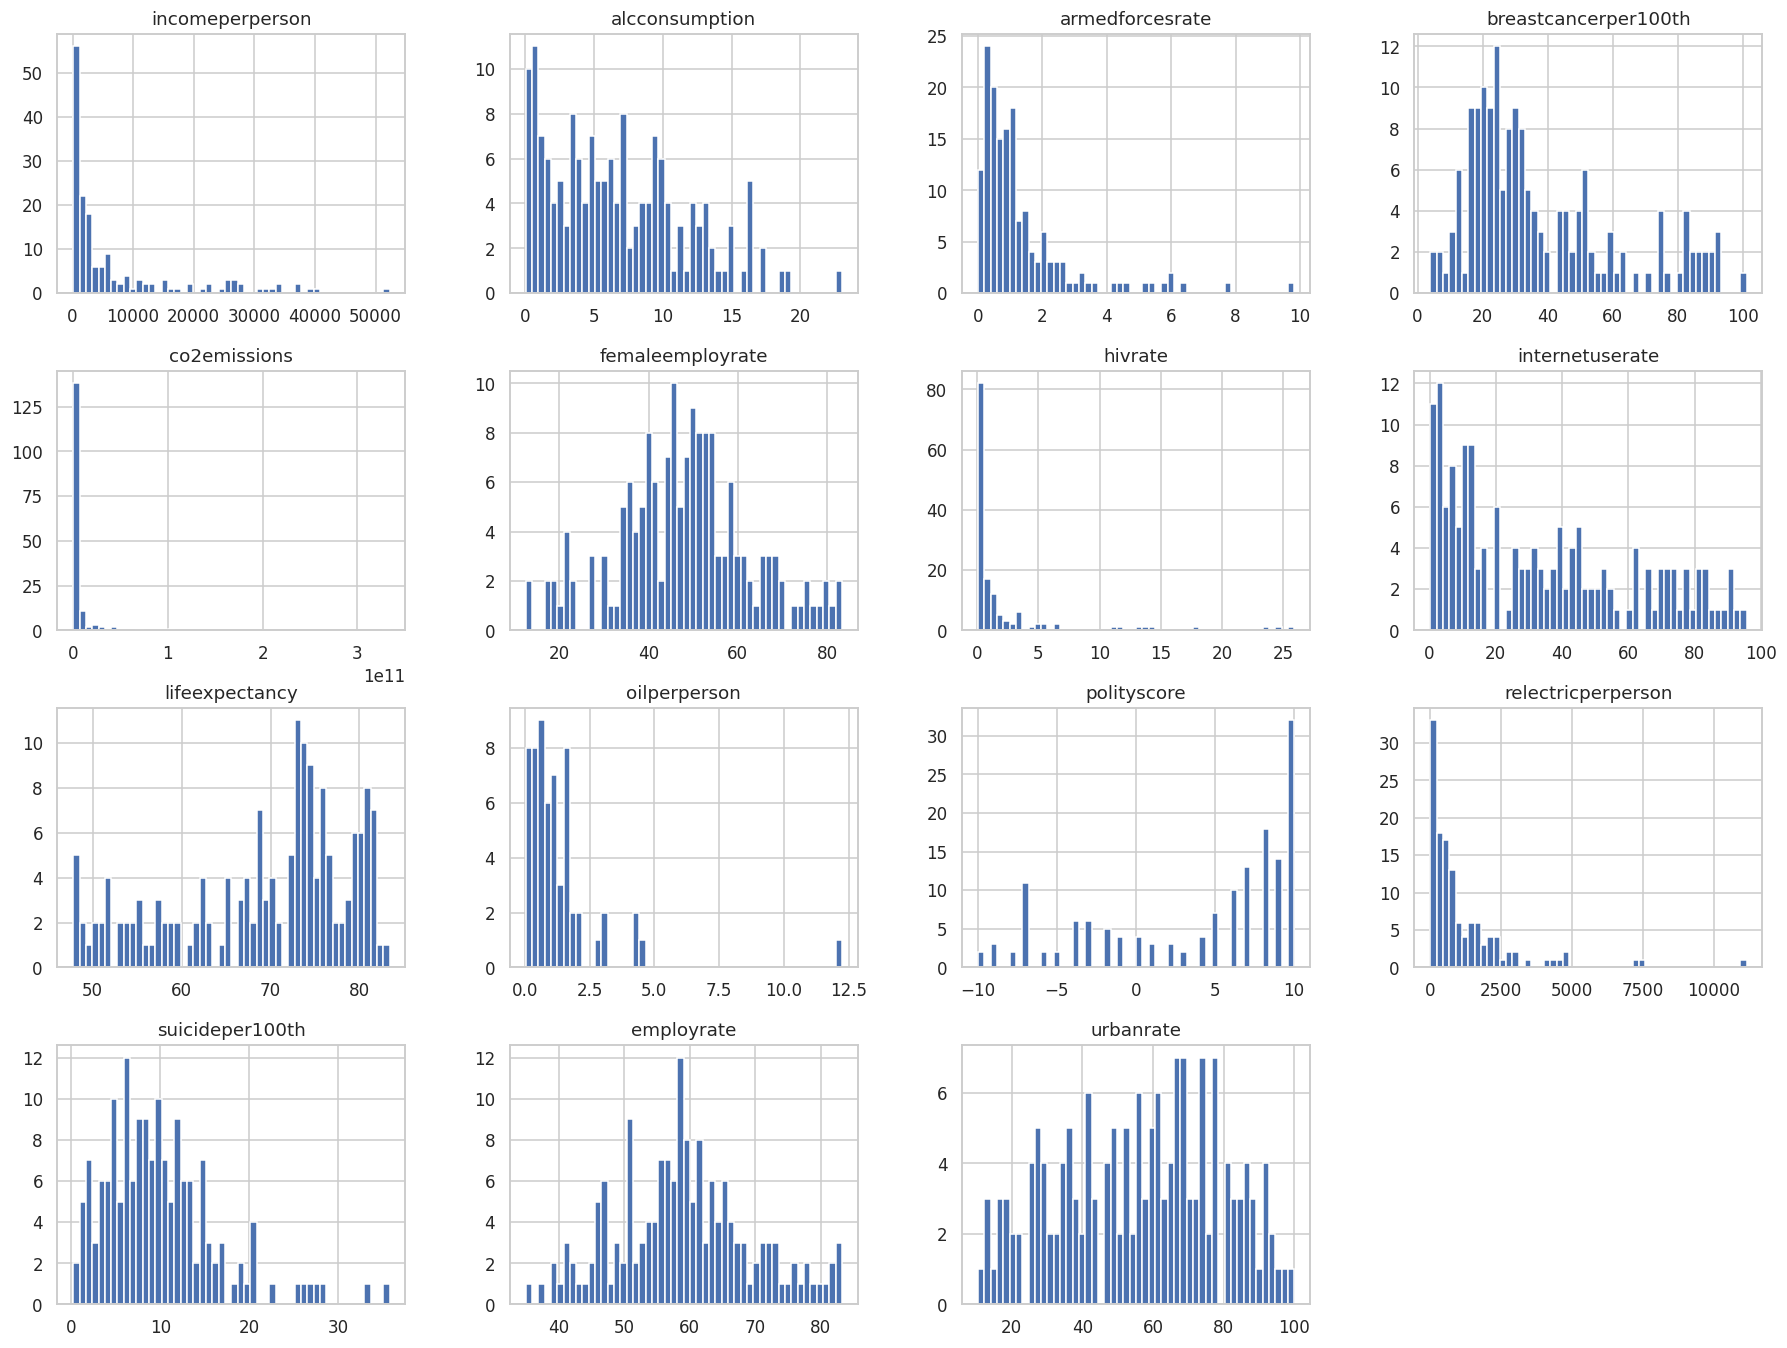

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
gapminder.hist(bins=50, figsize=(20,15))
plt.show()

# **Análisis Bivariado.**


Primero se revisa la matriz de correlación de las variables:

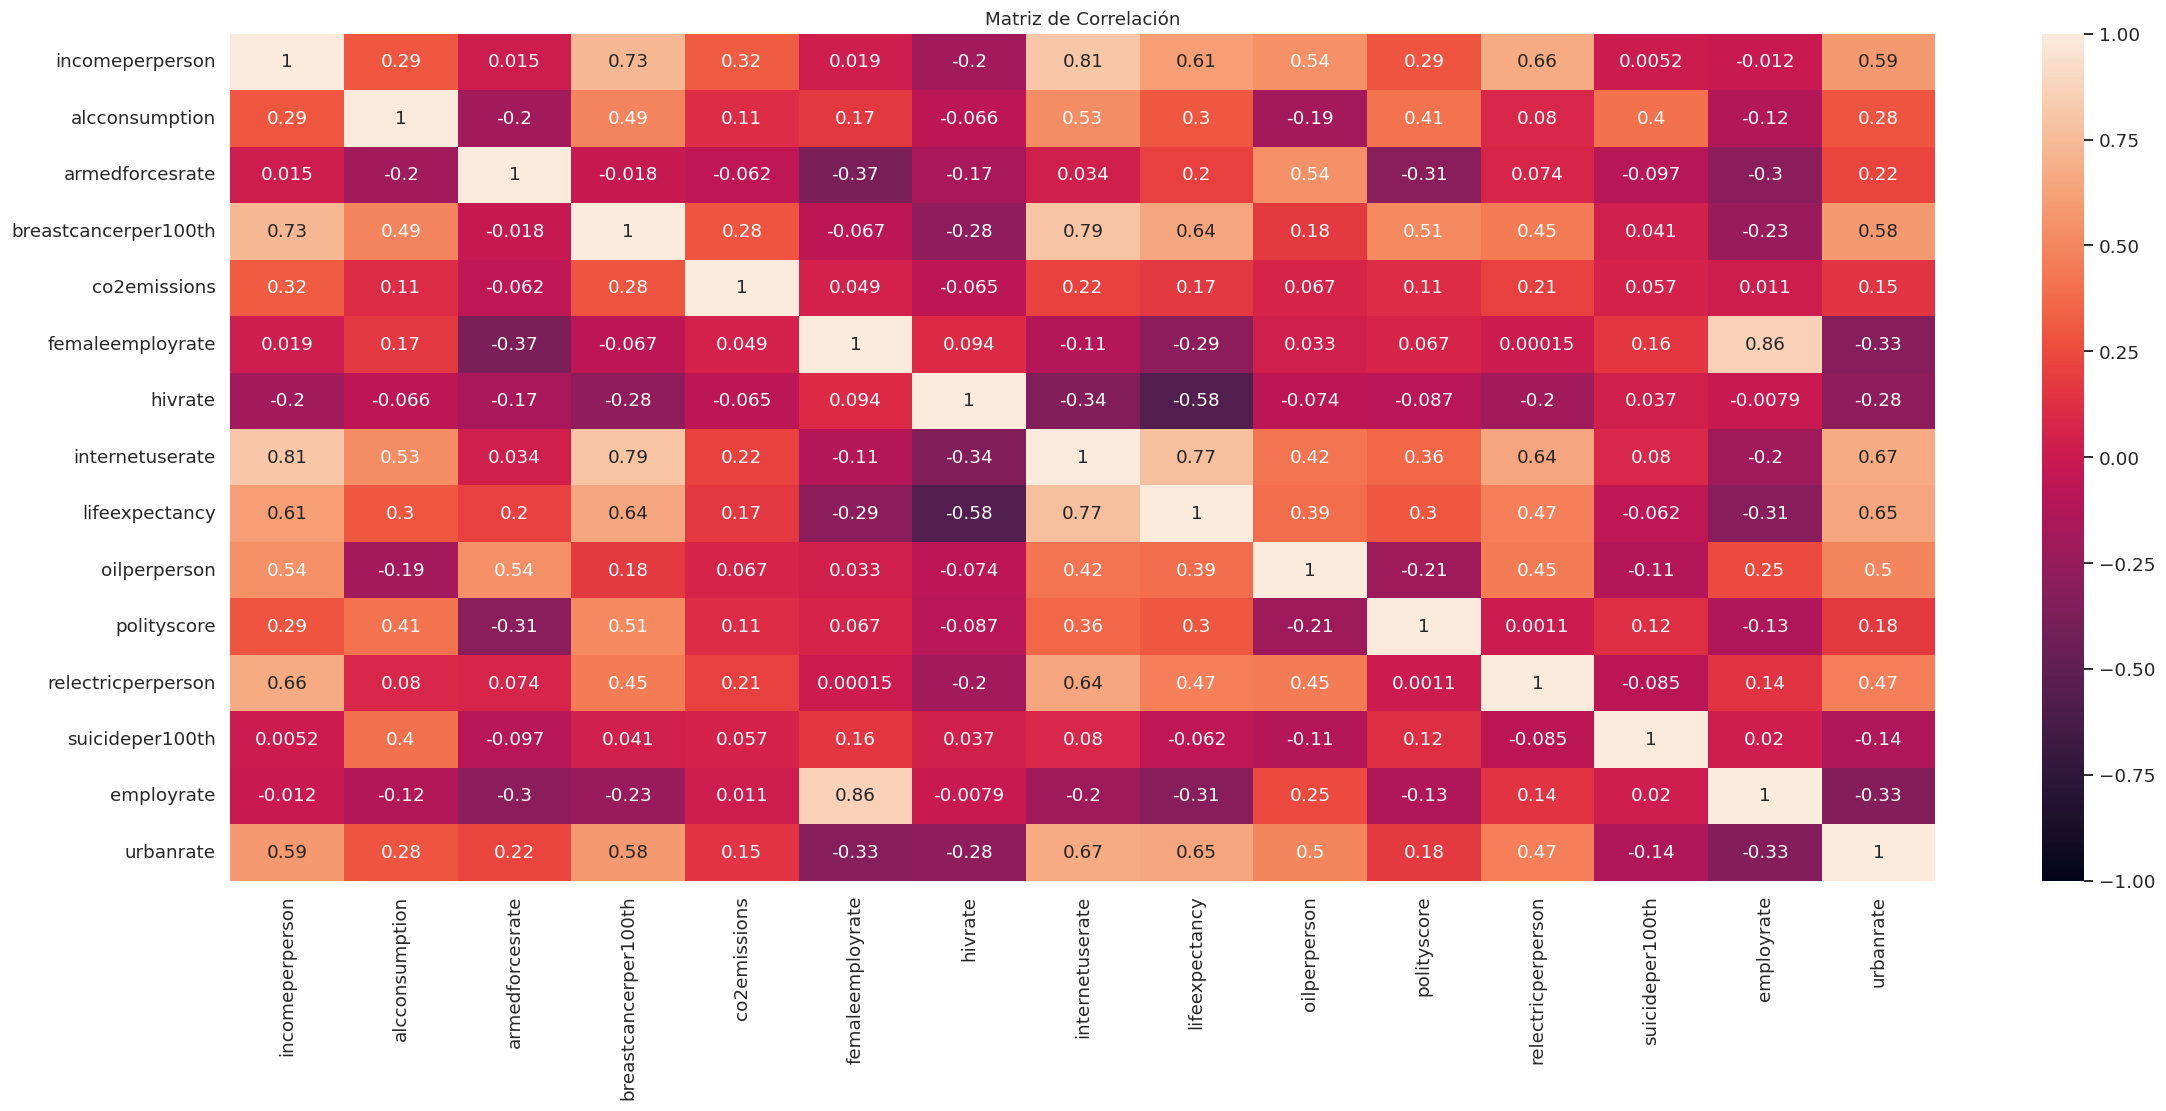

In [193]:
# Calcula la matriz de correlación
correlation_matrix = gapminder.corr()

# Visualiza la matriz de correlación usando seaborn
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True,  vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

In [55]:
#valores de correlación entre los datos
features = ['alcconsumption','armedforcesrate','breastcancerper100th','co2emissions','femaleemployrate','hivrate','internetuserate','lifeexpectancy','oilperperson','polityscore','relectricperperson','suicideper100th','employrate','urbanrate']
gapminder[features].corr()

,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
alcconsumption,1.000000,-0.200276,0.486369,0.114514,0.170437,-0.066048,0.527822,0.298306,-0.187963,0.408940,0.079874,0.399266,-0.118890,0.281925
armedforcesrate,-0.200276,1.000000,-0.018427,-0.061546,-0.372602,-0.167683,0.033782,0.204123,0.542695,-0.308008,0.074260,-0.097076,-0.298617,0.219098
breastcancerper100th,0.486369,-0.018427,1.000000,0.283369,-0.067247,-0.276212,0.791300,0.642505,0.179405,0.510423,0.446778,0.041202,-0.228354,0.579068
co2emissions,0.114514,-0.061546,0.283369,1.000000,0.049256,-0.065390,0.216415,0.167348,0.066635,0.113742,0.208282,0.056700,0.011009,0.153012
femaleemployrate,0.170437,-0.372602,-0.067247,0.049256,1.000000,0.094047,-0.106366,-0.292454,0.032879,0.067378,0.000151,0.158119,0.861480,-0.326801
hivrate,-0.066048,-0.167683,-0.276212,-0.065390,0.094047,1.000000,-0.343845,-0.575440,-0.074064,-0.086681,-0.200636,0.037441,-0.007870,-0.278096
internetuserate,0.527822,0.033782,0.791300,0.216415,-0.106366,-0.343845,1.000000,0.772426,0.418779,0.364595,0.643711,0.079820,-0.203617,0.669410
lifeexpectancy,0.298306,0.204123,0.642505,0.167348,-0.292454,-0.575440,0.772426,1.000000,0.389460,0.298189,0.467963,-0.061616,-0.313717,0.646224
oilperperson,-0.187963,0.542695,0.179405,0.066635,0.032879,-0.074064,0.418779,0.389460,1.000000,-0.210012,0.447572,-0.112649,0.245246,0.498886
polityscore,0.408940,-0.308008,0.510423,0.113742,0.067378,-0.086681,0.364595,0.298189,-0.210012,1.000000,0.001091,0.122742,-0.132070,0.179049


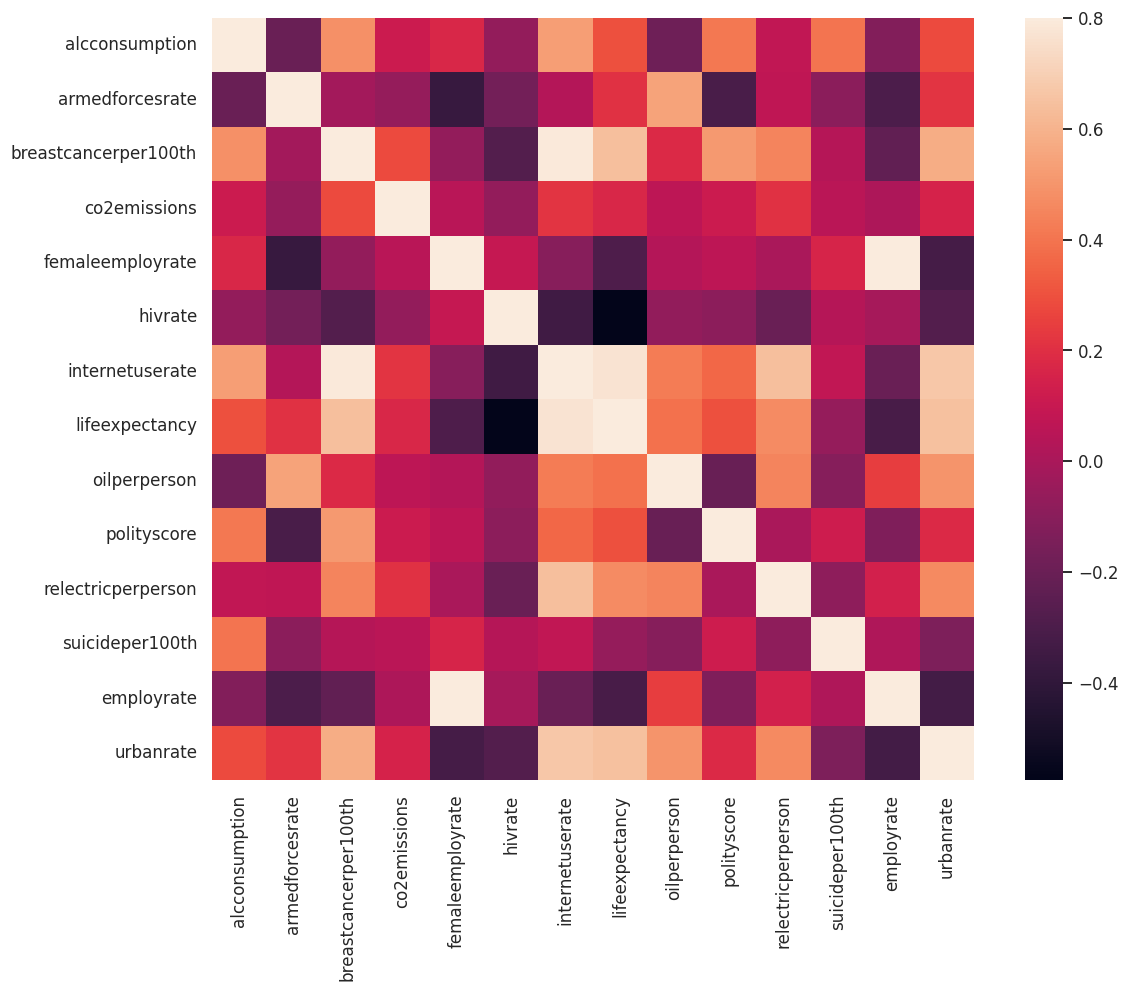

In [58]:
matriz = gapminder[features].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matriz, vmax=.8, square=True);

In [69]:
#Revisar valores de correlación respecto a la variable objetivo incomeperperson:
corr_matrix=pd.DataFrame(data=gapminder.corr())['incomeperperson'].abs().sort_values(ascending=False)
corr_matrix

incomeperperson         1.000000
internetuserate         0.808128
breastcancerper100th    0.730466
relectricperperson      0.664379
lifeexpectancy          0.606281
urbanrate               0.585350
oilperperson            0.542281
co2emissions            0.316875
alcconsumption          0.291129
polityscore             0.287579
hivrate                 0.201640
femaleemployrate        0.019218
armedforcesrate         0.015255
employrate              0.011747
suicideper100th         0.005159
Name: incomeperperson, dtype: float64

In [164]:
gapminder.corr()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,region_Africa,region_America,region_Asia,region_Europa,region_Oceania,incomeperperson_log
incomeperperson,1.000000,0.291129,0.015255,0.730466,0.316875,0.017949,-0.201640,0.808128,0.606281,0.542281,0.287579,0.664379,0.005159,-0.013093,0.585350,-0.376417,-0.023169,-0.026842,0.452148,0.027738,0.822303
alcconsumption,0.291129,1.000000,-0.200276,0.486369,0.114514,0.167841,-0.066048,0.527822,0.298306,-0.187963,0.408940,0.079874,0.399266,-0.120709,0.281925,-0.301166,0.037300,-0.334235,0.663928,-0.042440,0.385453
armedforcesrate,0.015255,-0.200276,1.000000,-0.018427,-0.061546,-0.367361,-0.167683,0.033782,0.204123,0.542695,-0.308008,0.074260,-0.097076,-0.293519,0.219098,-0.161645,-0.136976,0.406825,-0.088340,-0.086444,0.108220
breastcancerper100th,0.730466,0.486369,-0.018427,1.000000,0.283369,-0.068726,-0.276212,0.791300,0.642505,0.179405,0.510423,0.446778,0.041202,-0.229625,0.579068,-0.473275,0.049212,-0.184141,0.625130,0.100534,0.727803
co2emissions,0.316875,0.114514,-0.061546,0.283369,1.000000,0.048783,-0.065390,0.216415,0.167348,0.066635,0.113742,0.208282,0.056700,0.010514,0.153012,-0.128901,0.132821,-0.004930,0.034945,-0.020574,0.235862
femaleemployrate,0.017949,0.167841,-0.367361,-0.068726,0.048783,1.000000,0.094229,-0.108038,-0.293519,0.032879,0.066695,0.000151,0.156174,0.861581,-0.321889,0.221216,-0.035824,-0.195397,-0.036557,0.072253,-0.232933
hivrate,-0.201640,-0.066048,-0.167683,-0.276212,-0.065390,0.094229,1.000000,-0.343845,-0.575440,-0.074064,-0.086681,-0.200636,0.037441,-0.007596,-0.278096,0.511333,-0.126847,-0.211386,-0.213230,-0.064540,-0.227045
internetuserate,0.808128,0.527822,0.033782,0.791300,0.216415,-0.108038,-0.343845,1.000000,0.772426,0.418779,0.364595,0.643711,0.079820,-0.205131,0.669410,-0.557389,0.002177,-0.042521,0.642642,0.014059,0.860065
lifeexpectancy,0.606281,0.298306,0.204123,0.642505,0.167348,-0.293519,-0.575440,0.772426,1.000000,0.389460,0.298189,0.467963,-0.061616,-0.314900,0.646224,-0.783173,0.234018,0.168796,0.448082,0.058794,0.802120
oilperperson,0.542281,-0.187963,0.542695,0.179405,0.066635,0.032879,-0.074064,0.418779,0.389460,1.000000,-0.210012,0.447572,-0.112649,0.245246,0.498886,-0.122031,-0.069825,0.163272,-0.063722,0.039368,0.532526


Se nota que nuestra variable PIB esta altamente correlacionada con internetuserate, lo cual seria una varaible a descartar para el modelo.


# **Verificar la calidad de los datos**

- Verificación de datos duplicados:

Se tenian valores duplicados que fueron eliminados por lo tanto el conjunto de datos ya esta sin duplicados

In [73]:
gapminder[features].duplicated().sum()

0

- Verificación de datos faltantes:

 De las 16 variables del datas se tiene que 5 variables estan sin nulos y las restantes tiene nulos:

|Clasificación|Variables|
|---|---|
|variables sin nulos|	country, alcconsumption, lifeexpectancy, suicideper100th, urbanrate |
|variables con nulos|incomeperperson, armedforcesrate, breastcancerper100th, co2emissions, femaleemployrate, hivrate, internetuserate, oilperperson, polityscore, relectricperperson, employrate  |


Para las variables con datos nulos que no sean superior al 5 % se propone imputar los valores.




In [74]:
missing_data = gapminder.isnull()
complete_rows = gapminder.dropna()
num_complete_rows = len(complete_rows)
sns.set_style("white")
print(f"Hay {num_complete_rows} filas sin valores faltantes en el dataset, corresponde a {round((num_complete_rows/gapminder.shape[0])*100,1)}%")
complete_rows

Hay 56 filas sin valores faltantes en el dataset, corresponde a 34.4%


,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Ireland,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.20,69.770394,80.557,1.700262,10.0,2051.802338,10.365070,59.900002,61.34
4,Italy,18982.269290,9.72,1.729346,74.4,1.900045e+10,35.799999,0.30,53.740217,81.855,1.207250,10.0,1176.385457,4.930045,46.400002,68.08
5,Switzerland,37662.751250,11.41,0.524220,81.7,2.406741e+09,57.000000,0.40,82.166660,82.338,1.487412,10.0,2361.033336,13.239810,64.300003,73.48
9,Thailand,2712.517199,7.08,1.093651,16.6,4.200940e+09,65.000000,1.30,21.200072,74.126,0.726250,4.0,439.589732,9.847460,72.000000,33.32
19,Austria,26692.984110,12.40,0.815580,70.5,4.466084e+09,49.700001,0.30,72.731576,80.854,1.548791,10.0,2068.123309,13.094370,57.099998,67.16
22,Azerbaijan,2344.896916,13.34,1.976746,31.5,5.111077e+08,56.200001,0.10,46.679702,70.739,0.359173,-7.0,921.562111,1.380965,60.900002,51.92
23,"Korea, Rep.",16372.499780,19.15,2.833966,20.4,9.666892e+09,48.000000,0.06,82.515928,80.642,2.087848,8.0,1142.309009,22.404560,58.900002,81.46
25,Lithuania,5332.238591,16.30,1.487831,38.5,2.262553e+08,48.799999,0.10,62.811900,72.231,0.812369,10.0,758.858719,33.341860,53.099998,66.96
27,Belarus,2737.670379,18.85,3.711930,36.0,9.998743e+08,48.599998,0.30,32.052144,70.349,0.687828,-7.0,614.907287,26.874690,53.400002,73.46
33,South Africa,3745.649852,10.16,0.331863,35.0,1.460985e+10,34.299999,17.80,12.334893,52.797,0.504659,9.0,920.137600,15.714571,41.099998,60.74


Al revisar todas las variables y la cantidad de registros hay pocas filas  completas en todas sus variables, es decir, sin valores faltantes en el dataset lo que indica tenemos una proporción muy baja de registro completos el 34.4%, por lo que se ha de seleccionar un conjunto de variables para el modelo y realizarle imputación de datos para tener un dataset más completo.

- Verificación de datos atípicos:

El data set cuenta con 10 variables que presentan valores atipicos
incomeperperson, alcconsumption, armedforcesrate, breastcancerper100th,co2emissions,femaleemployrate,hivrate,oilperperson,relectricperperson,suicideper100th


- Verificación de datos inconsistentes:

 No se evidencio que el data set tuviese variables con valores inconsistentes


Del analisis previo se evidencio que hay variables que estan muy correlacionada, con la variable objetivo PIB, otras tienen un alto porcentaje de valores nulos para lo cual se seleccionara un conjunto de variables y con ellas se realizara un subconjunto.

Las variables de interes son:  
'country', 'femaleemployrate', 'lifeexpectancy', 'employrate', 'urbanrate', 'suicideper100th'



# **Preparación de datos.**

In [75]:
variables=['country', 'femaleemployrate', 'lifeexpectancy', 'employrate', 'urbanrate', 'suicideper100th']
data=gapminder[variables]
data.sample(10)

,country,femaleemployrate,lifeexpectancy,employrate,urbanrate,suicideper100th
104,Cameroon,49.000000,51.610,59.099998,56.76,7.214221
121,New Zealand,58.299999,80.654,65.000000,86.56,12.179760
46,"Yemen, Rep.",20.299999,65.493,39.000000,30.64,6.265789
40,Suriname,30.400000,70.563,44.700001,74.92,20.747431
107,Jamaica,47.500000,73.127,58.200001,53.30,4.417507
19,Austria,49.700001,80.854,57.099998,67.16,13.094370
64,Ethiopia,73.000000,59.274,80.699997,17.00,10.071942
53,Spain,41.700001,81.404,52.500000,77.12,5.888479
43,Mozambique,82.199997,50.239,77.000000,36.84,10.550375
9,Thailand,65.000000,74.126,72.000000,33.32,9.847460


Se crearan variables categóricas tales como:
Continente se asignara cada País al cotinente que pertenece.
Desarrollo
esto con la finalidad de poder imputar los datos faltantes en las variables de interes acorde con el continente al que pertenecen.



 al que pertenecen los paises,

In [76]:
regiones = {
    'Africa': ['Central African Rep.','Mauritania','Tanzania','Equatorial Guinea','Mali','Kenya','Lesotho','Cape Verde','Eritrea','Uganda','South Africa','Gabon','Gambia',
               'Mozambique','Angola','Swaziland','Ghana','Senegal','Ethiopia','Rwanda','Burundi','Burkina Faso','Morocco','Zimbabwe','Botswana','Congo, Dem. Rep.','Madagascar',
               'Togo','Benin','Sudan','Egypt','Cameroon','Congo, Rep.','Chad','Niger','Sierra Leone','Djibouti','Guinea','Algeria','Malawi','Liberia',"Cote d'Ivoire",'Libya','Zambia','Tunisia',
               'Guinea-Bissau','Nigeria','Mauritius','Namibia','Comoros'],
    'America': ['Barbados','Haiti','Guatemala','Bolivia','Panama','Cuba','Nicaragua','Argentina','Suriname','Costa Rica','Ecuador','Bahamas','Venezuela','Brazil','Colombia','Peru','Jamaica',
                 'Dominican Rep.','Honduras','Trinidad and Tobago','Belize','Uruguay','El Salvador','Chile','Canada','Mexico','Guyana','Paraguay','United States'],
    'Asia': ['Oman','Thailand','Iraq','Azerbaijan','Korea, Rep.','Saudi Arabia','Georgia','Cambodia','Japan','Yemen, Rep.','Armenia','Turkey','Pakistan','Vietnam','Syria','Uzbekistan','Bangladesh','Israel','Malaysia','Kuwait','Mongolia','Kyrgyzstan','China','India','Afghanistan','Cyprus','Kazakhstan','Tajikistan','Nepal','Iran','Singapore','Brunei','Myanmar','Bahrain','Jordan','Indonesia','Turkmenistan','Lebanon','Philippines','Sri Lanka','Bhutan','United Arab Emirates','Qatar','Timor-Leste','Laos'],
    'Europa': ['Ireland','Albania','Italy','Switzerland','Macedonia, FYR','Austria','Lithuania','Belarus','Estonia','Norway','Moldova','Spain','Croatia','Finland','Russia','Malta',
               'Germany','Slovak Republic','Poland','Iceland','Romania','Bulgaria','Luxembourg','Portugal','Ukraine','France','Slovenia','Belgium','Denmark','Hungary','Bosnia and Herzegovina','Sweden','United Kingdom','Czech Rep.','Netherlands','Greece','Latvia'],
    'Oceania':['Fiji','Solomon Islands','Papua New Guinea','Australia','New Zealand']
    }

In [77]:
def assign_region( x ):
    try:
        for region in regiones.keys():
            if x in regiones[ region ]:
                return region
        return None
    except TypeError:
        return None

In [78]:
gapminder[ 'region' ] = gapminder[ 'country' ].apply( assign_region )
gapminder.sample(5)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,region
72,Kyrgyzstan,372.728414,4.72,0.837768,23.0,8.797067e+07,48.799999,0.30,19.582316,67.714,NaN,1.0,428.312307,9.875281,58.900002,36.28,Asia
109,Cyprus,15313.859350,8.84,2.454913,67.2,1.835350e+08,51.299999,NaN,53.024745,79.591,NaN,10.0,2123.762863,2.206169,59.099998,69.90,Asia
125,Honduras,1392.411829,4.43,0.710823,25.9,1.317030e+08,34.200001,0.80,11.090765,73.126,NaN,7.0,278.739635,7.060184,56.299999,47.88,America
23,"Korea, Rep.",16372.499780,19.15,2.833966,20.4,9.666892e+09,48.000000,0.06,82.515928,80.642,2.087848,8.0,1142.309009,22.404560,58.900002,81.46,Asia
70,Ecuador,1728.020976,9.43,1.017946,23.5,6.920393e+08,45.500000,0.40,28.999477,75.632,0.732817,5.0,314.826200,8.504684,59.700001,65.58,America


In [79]:
caracteristicas_dtf(gapminder)

Las dimensiones del conjunto de datos son: (163, 17), correspondiente a 163 registros y 17 columnas (variables)

El listado de variables para el conjunto de datos es:
Index(['country', 'incomeperperson', 'alcconsumption', 'armedforcesrate',
       'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate',
       'internetuserate', 'lifeexpectancy', 'oilperperson', 'polityscore',
       'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate',
       'region'],
      dtype='object')

Los tipos de variable leído del conjunto de datos son:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 177
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               163 non-null    object 
 1   incomeperperson       163 non-null    float64
 2   alcconsumption        163 non-null    float64
 3   armedforcesrate       159 non-null    float64
 4   breastcancerper100

Para las variables  femaleemployrate (1), employrate(1) que tienen valores vacios se imputara con la media acorde con la región a la que pertenece


- Imputación femaleemployrate

In [80]:
nulasedad = gapminder[gapminder['femaleemployrate'].isnull()]
nulasedad
#127

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,region
127,Djibouti,895.31834,1.87,3.451546,19.5,14054333.33,NaN,2.5,6.497924,57.937,NaN,2.0,NaN,4.993476,NaN,87.3,Africa


In [81]:
prom_reg_edad = gapminder.groupby('region')['femaleemployrate'].mean()
prom_reg_edad

region
Africa     52.902041
America    46.903448
Asia       43.173809
Europa     47.043243
Oceania    53.980000
Name: femaleemployrate, dtype: float64

In [82]:
for index, row in gapminder.iterrows():
    if pd.isna(row['femaleemployrate']):  # Comprueba si el valor de PIB es NaN
        # Si es NaN, imputa el promedio de la región correspondiente
        region = row['region']
        if region in prom_reg_edad:
            gapminder.at[index, 'femaleemployrate'] = prom_reg_edad[region]

In [83]:
gapminder[gapminder['femaleemployrate'].isnull()]

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,region


- Imputación  employrate

In [84]:
nulosempleo = gapminder[gapminder['employrate'].isnull()]
nulosempleo
#127

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,region
127,Djibouti,895.31834,1.87,3.451546,19.5,14054333.33,52.902041,2.5,6.497924,57.937,NaN,2.0,NaN,4.993476,NaN,87.3,Africa


In [85]:
prom_reg_empleo = gapminder.groupby('region')['employrate'].mean()
prom_reg_empleo

region
Africa     62.865306
America    60.079311
Asia       58.045238
Europa     53.816216
Oceania    63.660001
Name: employrate, dtype: float64

In [86]:
for index, row in gapminder.iterrows():
    if pd.isna(row['employrate']):  # Comprueba si el valor de PIB es NaN
        # Si es NaN, imputa el promedio de la región correspondiente
        region = row['region']
        if region in prom_reg_empleo:
            gapminder.at[index, 'employrate'] = prom_reg_empleo[region]

In [87]:
gapminder[gapminder['employrate'].isnull()]

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,region


- Transformación de columnas categóricas.

Dado que la variable 'country' tiene muchas categorias que haria dificil convertirla a variables dummies se decide eliminarla

In [88]:
gapminder.drop('country', axis=1, inplace=True)

Para la variable región se convierten a variables Dummi para ser tenidas en cuenta en el modelo

In [91]:
# one hot enconding
gapminder = pd.get_dummies(gapminder, columns=["region"], drop_first=False)

In [92]:
gapminder.head(15)

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,region_Africa,region_America,region_Asia,region_Europa,region_Oceania
0,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.2,69.770394,80.557,1.700262,10.0,2051.802338,10.365070,59.900002,61.34,0,0,0,1,0
1,1914.996551,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.989947,76.918,NaN,9.0,636.341383,7.699330,51.400002,46.72,0,0,0,1,0
2,239.518749,3.17,0.148659,16.5,8.338000e+06,62.900002,4.7,2.300027,48.398,NaN,-1.0,NaN,13.548420,71.300003,38.58,1,0,0,0,0
3,9243.587053,6.42,0.663956,62.5,3.616067e+07,60.299999,1.4,70.028599,76.835,NaN,NaN,NaN,3.108603,66.900002,39.84,0,1,0,0,0
4,18982.269290,9.72,1.729346,74.4,1.900045e+10,35.799999,0.3,53.740217,81.855,1.207250,10.0,1176.385457,4.930045,46.400002,68.08,0,0,0,1,0
5,37662.751250,11.41,0.524220,81.7,2.406741e+09,57.000000,0.4,82.166660,82.338,1.487412,10.0,2361.033336,13.239810,64.300003,73.48,0,0,0,1,0
6,609.131206,0.11,1.551262,28.1,5.681867e+07,45.299999,0.7,2.999803,58.582,NaN,-2.0,NaN,6.882952,46.900002,41.00,1,0,0,0,0
7,11191.811010,0.92,4.465998,13.2,4.879930e+08,22.600000,0.1,61.987413,72.974,NaN,-8.0,2124.608816,3.716739,50.700001,71.62,0,0,1,0,0
8,456.385712,7.86,0.134730,21.1,1.007820e+08,76.099998,5.6,11.000055,58.199,NaN,-1.0,38.634503,12.411181,78.199997,25.52,1,0,0,0,0
9,2712.517199,7.08,1.093651,16.6,4.200940e+09,65.000000,1.3,21.200072,74.126,0.726250,4.0,439.589732,9.847460,72.000000,33.32,0,0,1,0,0


# **Separación de variable dependiente y variables independientes.**

 una práctica común para validar esto es separando el conjunto de datos etiquetado en dos partes: entrenamiento y prueba. La proporción reservada para probar el modelo es definida por el analista, pero un valor común es 30%.

Se preparan los datasets de la variable dependiente y las variables independientes

In [94]:
np.random.seed(28)
features=['femaleemployrate', 'lifeexpectancy', 'employrate', 'urbanrate', 'suicideper100th', 'region_Africa', 'region_America', 'region_Asia', 'region_Europa','region_Oceania']
X_train, X_test, y_train, y_test = train_test_split(gapminder[features], gapminder['incomeperperson'], test_size=0.3, random_state=28)
print(f'Entrenamiento-Train: {X_train.shape}')
print(f'Prueba-Test: {X_test.shape}')


Entrenamiento-Train: (114, 10)
Prueba-Test: (49, 10)


In [96]:
# Se estandariza el dataset usando 'StandarScaler'
name_columns = X_train.columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(X_train.values) # Solo para datos de entrenamiento se utiliza "fit_transform"
x_test = sc.transform(X_test.values)

# Los datos se transforman a dataframes para mayor comodidad
x_train = pd.DataFrame(data=X_train, columns=name_columns)
x_test = pd.DataFrame(data=X_test, columns=name_columns)

# **Entrenamiento de modelo.**

1. Regresión lineal simple

In [105]:
regression = LinearRegression() # modelo 1

In [106]:
regression.fit(X_train, y_train)

LinearRegression()

In [107]:
pd.DataFrame({"columns": features, "coef": regression.coef_})

,columns,coef
0,femaleemployrate,-78.982027
1,lifeexpectancy,516.396159
2,employrate,429.460622
3,urbanrate,185.025874
4,suicideper100th,120.532599
5,region_Africa,1110.250028
6,region_America,-4743.295185
7,region_Asia,-1112.693753
8,region_Europa,3498.651662
9,region_Oceania,1247.087247


In [100]:
regression.intercept_ # intercepto model 1

-61855.58051382306

In [124]:
y_train.mean(), y_test.mean()

(7200.689680751754, 7205.11205652449)

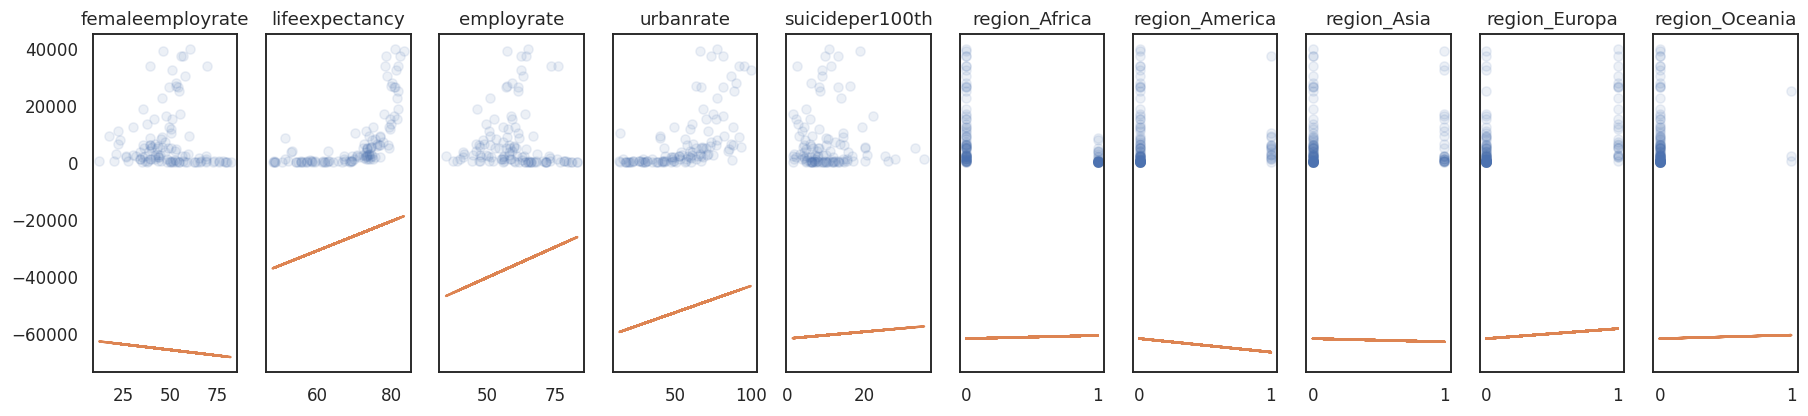

In [101]:
f, axs = plt.subplots(1, len(features), sharey=True, figsize=(20, 4))

for i in range(len(features)):
    col = features[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

In [123]:
# medidas del modelo 1
print("MAE:")
print("Train:", mean_absolute_error(y_train, regression.predict(X_train)))
print("Test:", mean_absolute_error(y_test, regression.predict(X_test)))

print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, regression.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, regression.predict(X_test))))


MAE:
Train: 4930.643470668103
Test: 5620.192939098241

RMSE:
Train: 6521.974354846307
Test: 7791.262418240838


Analisis del error

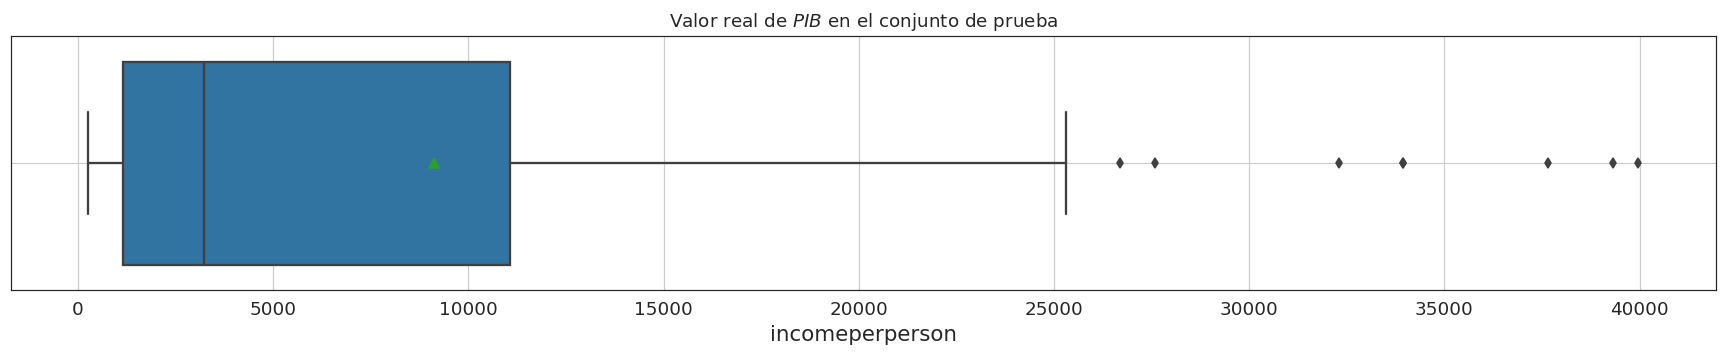

In [ ]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=y_test, showmeans=True, orient="h")
plt.title("Valor real de $\t{PIB}$ en el conjunto de prueba")
plt.grid()
plt.show()

In [ ]:
y_test.describe(percentiles=[0.25, 0.5, 0.75, 0.99])

count       53.000000
mean      9108.023800
std      12139.296825
min        269.892881
25%       1143.831514
50%       3233.423780
75%      11066.784140
99%      39627.658337
max      39972.352770
Name: incomeperperson, dtype: float64

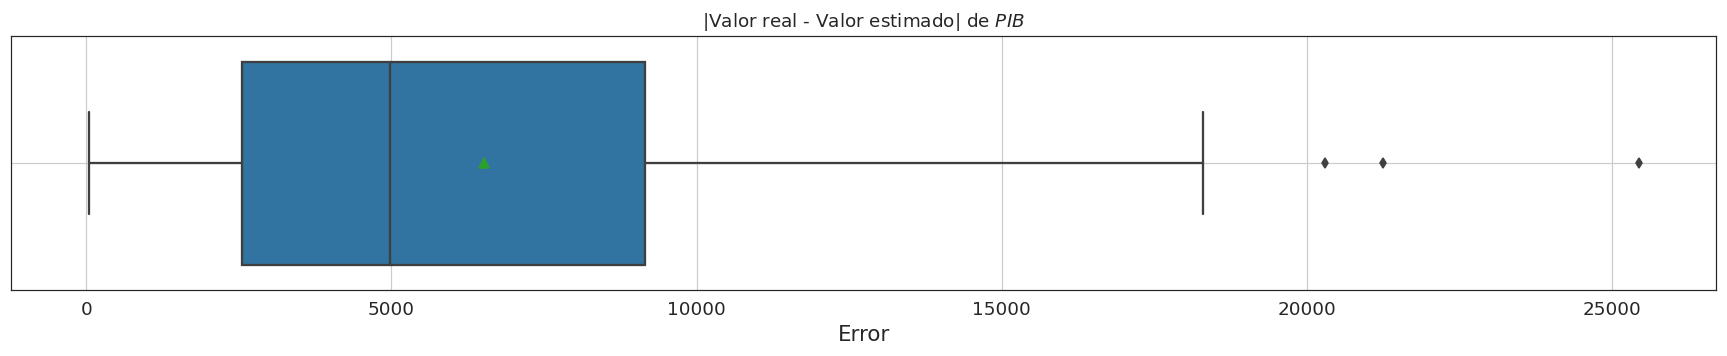

In [ ]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=abs(y_test - regression.predict(X_test)), showmeans=True, orient="h")
plt.title("|Valor real - Valor estimado| de $\t{PIB}$")
plt.xlabel("Error")
plt.grid()
plt.show()

In [ ]:
abs(y_test-regression.predict(X_test)).describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count       53.000000
mean      6510.691265
std       5851.062283
min         34.396067
25%       2543.275136
50%       4983.532228
75%       9161.772303
95%      19101.934211
99%      23263.252682
max      25439.034487
Name: incomeperperson, dtype: float64

Entrenamiento de un segundo modelo aplicando normalización

In [108]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [109]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [110]:
pd.DataFrame({"columns": features, "coef": pipeline["model"].coef_})

,columns,coef
0,femaleemployrate,-1150.071855
1,lifeexpectancy,5121.256856
2,employrate,4530.204490
3,urbanrate,4164.053769
4,suicideper100th,775.804010
5,region_Africa,491.155702
6,region_America,-1793.194825
7,region_Asia,-502.114977
8,region_Europa,1458.373579
9,region_Oceania,188.683420


In [111]:
pipeline["model"].intercept_

7200.689680751749

In [112]:
y_train.mean(), y_test.mean()

(7200.689680751754, 7205.11205652449)

Al haber normalizado las variables de entrada la media en el conjunto de entrenamiento y de prueba para la variable objetivo es muy parecido

In [ ]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train)))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))

MAE:
Train: 4411.018254659669
Test: 6510.691264552173

RMSE:
Train: 5712.793304070479
Test: 8716.541086091042


<span style="color: red;">Recuerde que la normalización de datos no siempre implica mejores métricas de error pero si garantiza un mejor proceso de entrenamiento y, dependiendo de la técnica de normalización utilizada, menor sensibilidad a valores atípicos.</span>

In [171]:
# modelo laso
pipelineLaso = Pipeline([
    ("scaler", StandardScaler()),  # Escalador para estandarizar las características
    ("model", Lasso(alpha=1))   # Lasso con alpha=1.0 (puedes ajustar este hiperparámetro)
])

In [173]:
pipelineLaso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso(alpha=1))])

In [174]:
pd.DataFrame({"columns": features, "coef": pipelineLaso["model"].coef_})

,columns,coef
0,femaleemployrate,-2062.429771
1,lifeexpectancy,1121.092559
2,employrate,2189.015919
3,urbanrate,1030.688664
4,suicideper100th,164.929147
5,region_Africa,-0.000000
6,region_America,9.966598
7,region_Asia,-174.274432
8,region_Europa,873.808888
9,region_Oceania,-53.541032


In [176]:
print("MAE:")
print("Train Lasso:", mean_absolute_error(y_train, pipelineLaso.predict(X_train)))
print("Test:", mean_absolute_error(y_test, pipelineLaso.predict(X_test)))
print("\nRMSE  Lasso:")
print("Train Lasso:", np.sqrt(mean_squared_error(y_train, pipelineLaso.predict(X_train))))
print("Test Lasso:", np.sqrt(mean_squared_error(y_test, pipelineLaso.predict(X_test))))

MAE:
Train Lasso: 1699.1394463969677
Test: 1792.5513805941498

RMSE  Lasso:
Train Lasso: 2369.603153040319
Test Lasso: 2226.6119343883984


In [177]:
grpol = 2 # Puedes ajustar el grado del polinomio según sea necesario
poly_features = PolynomialFeatures(degree=grpol)
X_poly = poly_features.fit_transform(X_train)

In [180]:
regression_poly = make_pipeline(PolynomialFeatures(degree=grpol), LinearRegression())
regression_poly.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [181]:
print(f"MAE Polinomical regresion {grpol}  :")
print("Train:", mean_absolute_error(y_train, regression_poly.predict(X_train)))
print("Test:", mean_absolute_error(y_test, regression_poly.predict(X_test)))
print(f"\nRMSE regresion {grpol} :")
print("Train:", np.sqrt(mean_squared_error(y_train, regression_poly.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, regression_poly.predict(X_test))))

MAE Polinomical regresion 2  :
Train: 1225.7529525319146
Test: 1596.4405286692306

RMSE regresion 2 :
Train: 1668.2332135061265
Test: 2086.2934197069053


In [182]:
y_trainlog = np.log(y_train)
y_testlog=np.log(y_test)

In [183]:
regression_log = LinearRegression()
regression_log.fit(X_train, y_trainlog)

LinearRegression()

In [195]:

pd.DataFrame({"columns": features, "coef": regression_log.coef_})

,columns,coef
0,femaleemployrate,-0.015546
1,lifeexpectancy,0.064046
2,employrate,0.014862
3,urbanrate,0.024663
4,suicideper100th,0.020027
5,region_Africa,-0.186537
6,region_America,0.010768
7,region_Asia,-0.309288
8,region_Europa,0.170280
9,region_Oceania,0.314778


In [184]:
print(f"MAE Logaritmical regresion:")
print("Train:", mean_absolute_error(y_trainlog, regression_log.predict(X_train)))
print("Test:", mean_absolute_error(y_testlog, regression_log.predict(X_test)))
print(f"\nRMSE Logaritmical regresion :")
print("Train:", np.sqrt(mean_squared_error(y_trainlog, regression_log.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_testlog, regression_log.predict(X_test))))

MAE Logaritmical regresion:
Train: 0.5528606398121843
Test: 0.4889678055342581

RMSE Logaritmical regresion :
Train: 0.7555345990403958
Test: 0.6548747411873668


##  Validación de supuestos de la regresión



###  Colinealidad

Es necesario que las variables utilizadas no tengan (o tengan muy baja) colinealidad (correlación).

<Axes: >

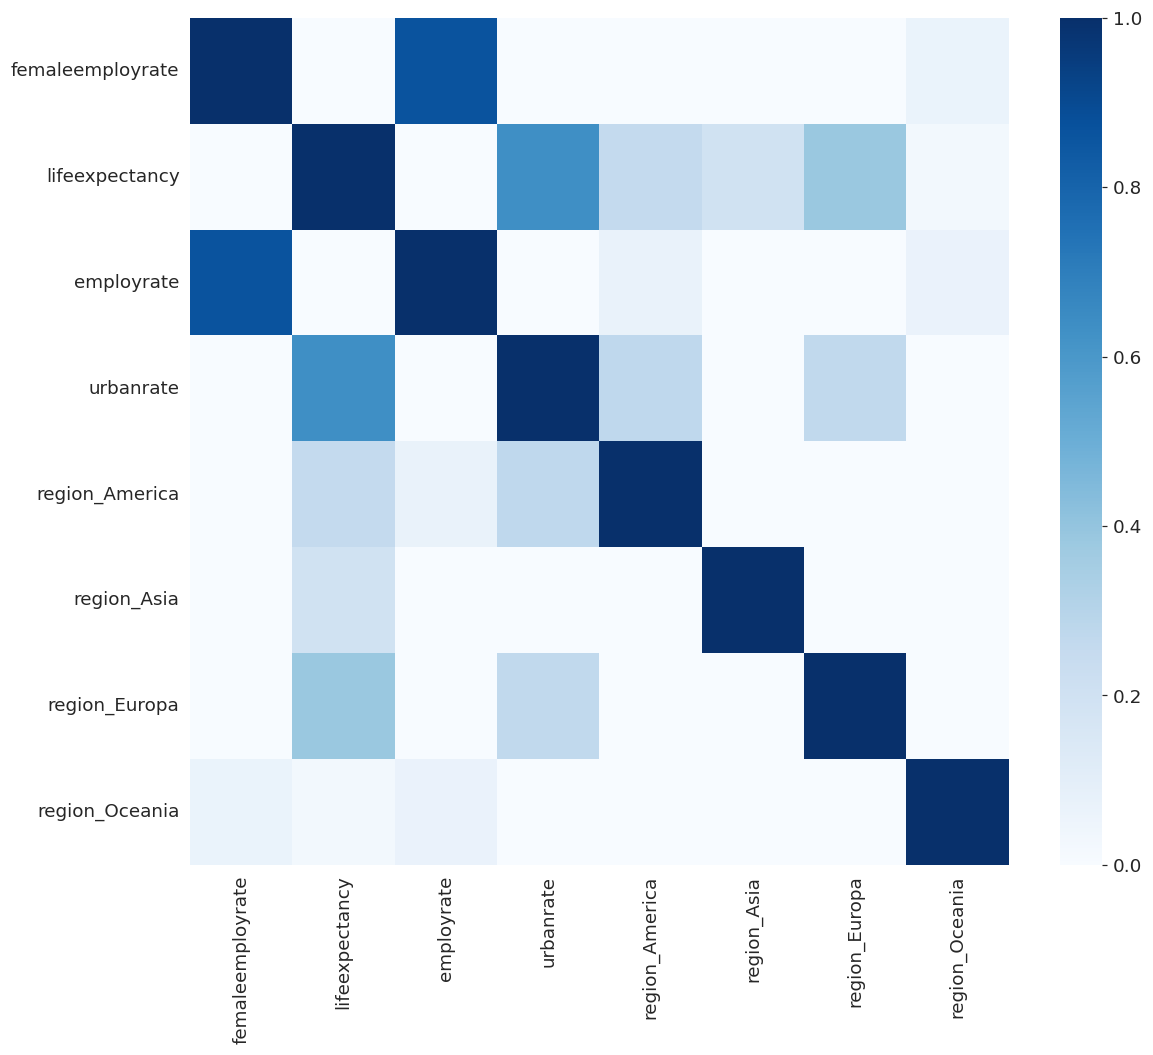

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), cmap="Blues", vmin=0, vmax=1)

In [125]:
X_train.corr()

,femaleemployrate,lifeexpectancy,employrate,urbanrate,suicideper100th,region_Africa,region_America,region_Asia,region_Europa,region_Oceania
femaleemployrate,1.000000,-0.300971,0.870196,-0.372012,0.097071,0.253584,-0.080797,-0.162673,-0.068161,0.054401
lifeexpectancy,-0.300971,1.000000,-0.343709,0.623977,-0.035317,-0.786709,0.207456,0.191418,0.485303,0.036479
employrate,0.870196,-0.343709,1.000000,-0.358445,-0.019785,0.299669,0.012174,-0.045666,-0.316374,0.050710
urbanrate,-0.372012,0.623977,-0.358445,1.000000,-0.183885,-0.413852,0.154398,0.053477,0.281596,-0.030635
suicideper100th,0.097071,-0.035317,-0.019785,-0.183885,1.000000,-0.108548,-0.105166,0.045931,0.185706,-0.050704
region_Africa,0.253584,-0.786709,0.299669,-0.413852,-0.108548,1.000000,-0.316228,-0.393919,-0.393919,-0.116248
region_America,-0.080797,0.207456,0.012174,0.154398,-0.105166,-0.316228,1.000000,-0.249136,-0.249136,-0.073521
region_Asia,-0.162673,0.191418,-0.045666,0.053477,0.045931,-0.393919,-0.249136,1.000000,-0.310345,-0.091584
region_Europa,-0.068161,0.485303,-0.316374,0.281596,0.185706,-0.393919,-0.249136,-0.310345,1.000000,-0.091584
region_Oceania,0.054401,0.036479,0.050710,-0.030635,-0.050704,-0.116248,-0.073521,-0.091584,-0.091584,1.000000


Dado que no se evidencian correlaciones superiores al 90% el modelo no presenta colinealidad

### Linealidad

Es necesario que la relación entre cada variable de entrada y la varable objetivo sea lineal.

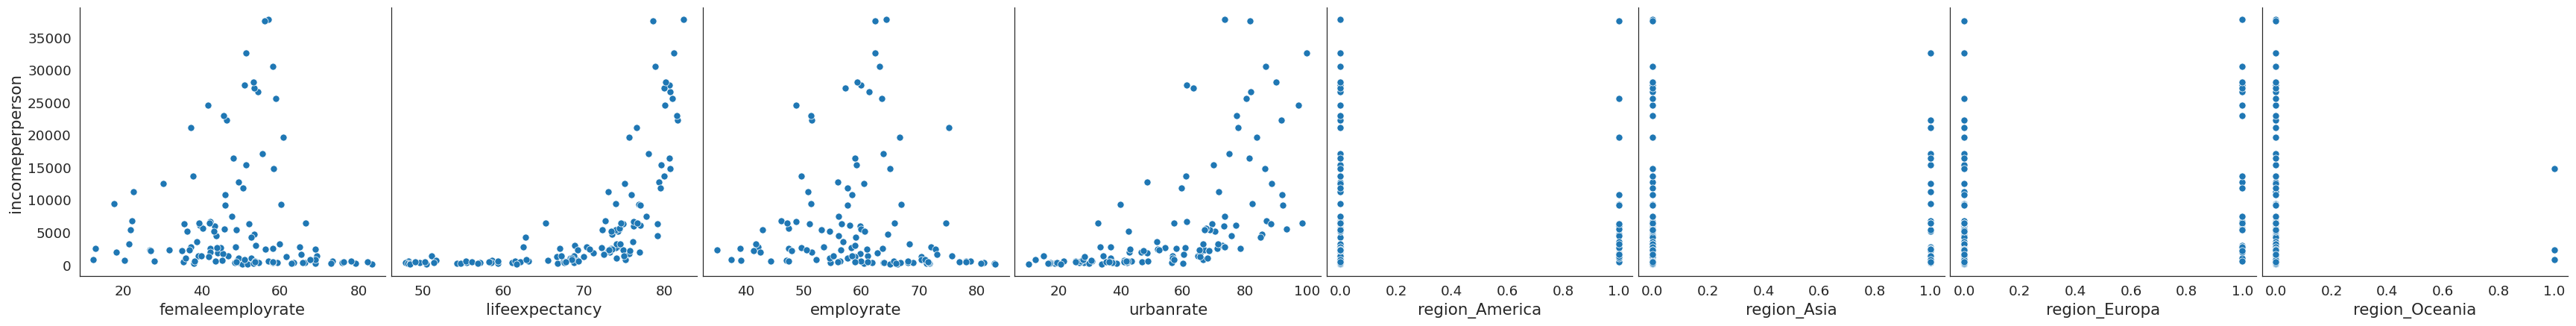

In [ ]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), height=4, y_vars="incomeperperson", x_vars=features, kind="scatter")

La forma más común de comprobarlo es agregar una transformación polinomial (PolynomialFeatures) de algún grado integrada al Pipeline.


In [150]:
# modelo 3 transformacion polinomial grado 2
pipeline2 = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=3, include_bias=False)),
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [151]:
pipeline2.fit(X_train[features], y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [152]:
pd.DataFrame({"columns": pipeline2["poly"].get_feature_names_out(), "coef": pipeline2["model"].coef_})

,columns,coef
0,femaleemployrate,-32518.946441
1,lifeexpectancy,-22778.897054
2,employrate,-37032.533239
3,urbanrate,-44806.769632
4,suicideper100th,22845.990434
...,...,...
280,region_Asia region_Oceania^2,0.000000
281,region_Europa^3,-16711.829829
282,region_Europa^2 region_Oceania,0.000000
283,region_Europa region_Oceania^2,0.000000


In [153]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train[features])))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test[features])))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train[features]))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test[features]))))

MAE:
Train: 2345.026352936887
Test: 2656.210220406387

RMSE:
Train: 3189.4276369639683
Test: 3524.5793844977525


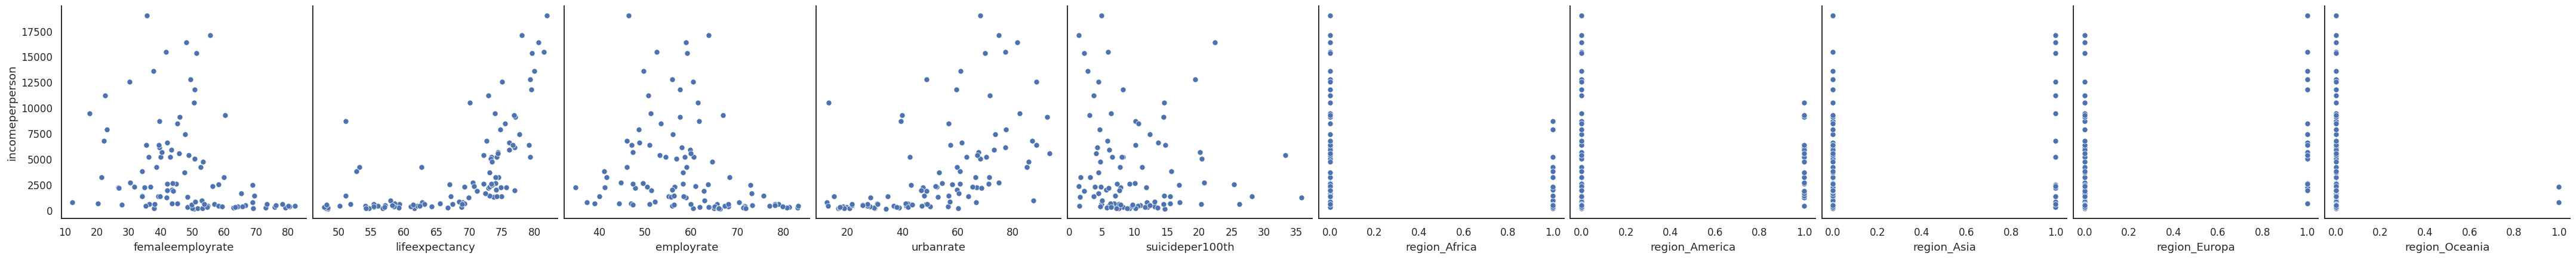

In [154]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), height=4, y_vars="incomeperperson", x_vars=features, kind="scatter")

### Normalidad de los errores

Los errores deben tener una distribución normal.

In [134]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [135]:
pipeline.fit(X_train[features], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [136]:
errors = (pipeline.predict(X_train[features])-y_train).values
# Valores negativos indican subestimación mientras que valores positivos indican sobreestimación.

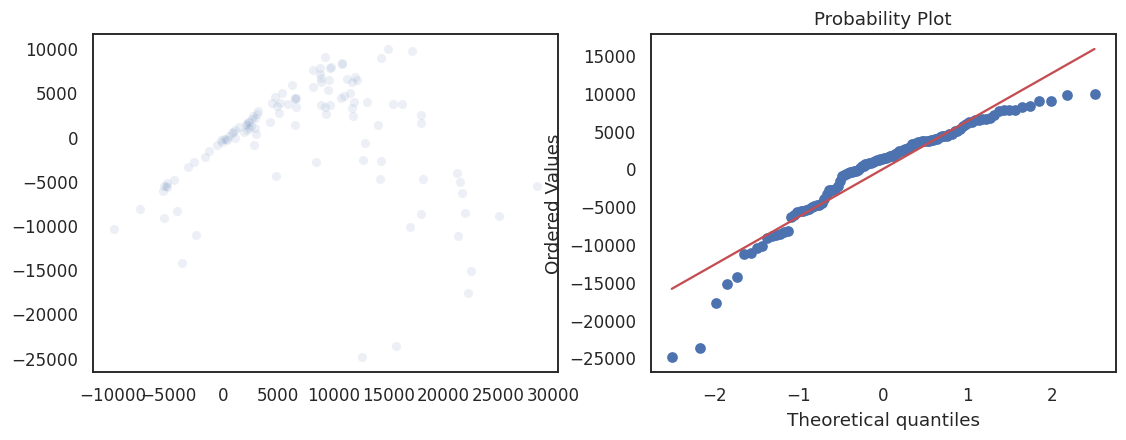

In [137]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipeline.predict(X_train[features]), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

Una estrategia para mejorar este escenario es eliminar los registros cuyo valor de variable objetivo pueda considerarse un valor atípico.

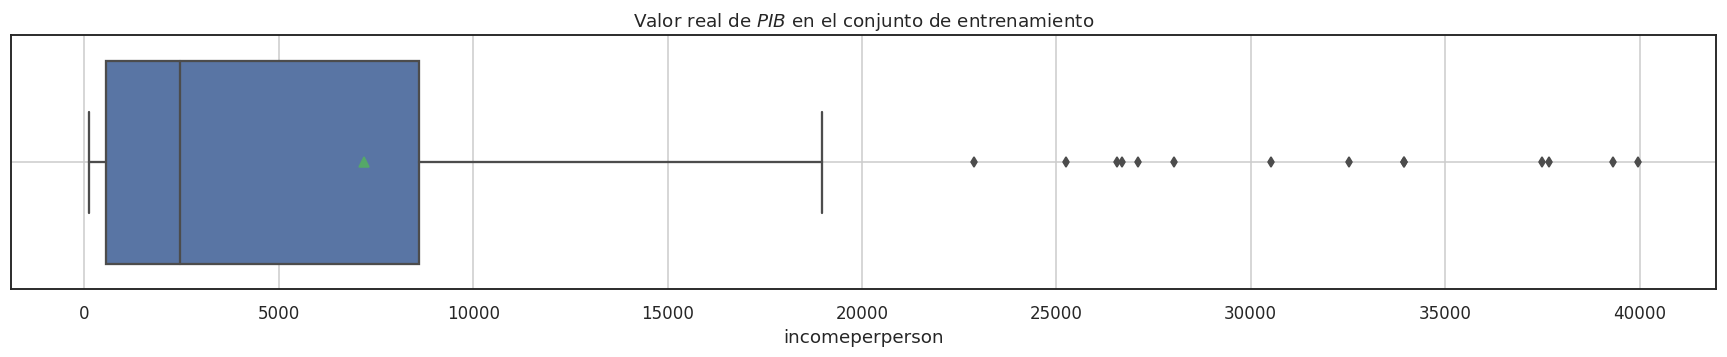

In [138]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=y_train, showmeans=True, orient="h")
plt.title("Valor real de $\t{PIB}$ en el conjunto de entrenamiento")
plt.grid()
plt.show()

In [155]:
q1 = y_train.quantile(0.25)
q3 = y_train.quantile(0.75)
iqr = q3-q1
threshold = q3+1.5*iqr
threshold

13111.589043224998

In [156]:
# elimino atipicos
y_train = y_train.loc[y_train <= threshold]
X_train = X_train.loc[y_train.index]

In [157]:
y_test = y_test.loc[y_test <= threshold]
X_test = X_test.loc[y_test.index]

In [158]:
pipeline.fit(X_train[features], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [163]:
pd.DataFrame({"columns": features, "coef": pipeline["model"].coef_})

,columns,coef
0,femaleemployrate,-2076.494238
1,lifeexpectancy,1120.999306
2,employrate,2204.525867
3,urbanrate,1031.666689
4,suicideper100th,166.560330
5,region_Africa,-165.776422
6,region_America,-122.795592
7,region_Asia,-316.072092
8,region_Europa,754.208511
9,region_Oceania,-103.085311


In [160]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train[features])))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test[features])))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train[features]))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test[features]))))

MAE:
Train: 1699.3978799572678
Test: 1795.4925636968383

RMSE:
Train: 2369.595045384432
Test: 2229.9499535433783


In [146]:
errors = (pipeline.predict(X_train[features])-y_train).values

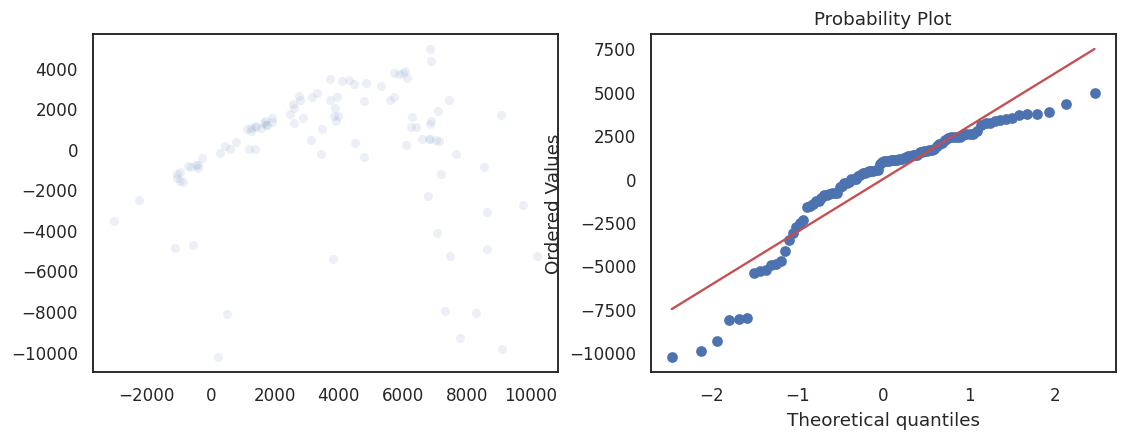

In [147]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipeline.predict(X_train[features]), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

In [185]:
errors = (regression_log.predict(X_train)-y_trainlog).values

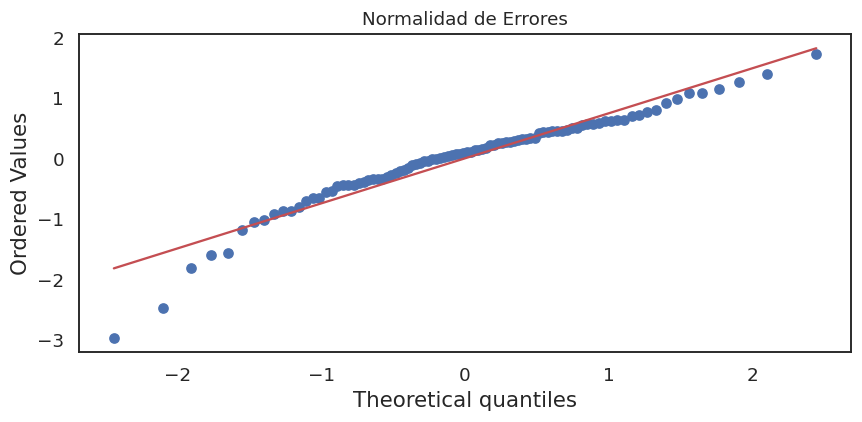

In [186]:
fig, ax = plt.subplots(figsize=(8, 4))
_ = stats.probplot(errors, dist="norm", plot=ax)
ax.set_title('Normalidad de Errores')
plt.tight_layout()
plt.show()

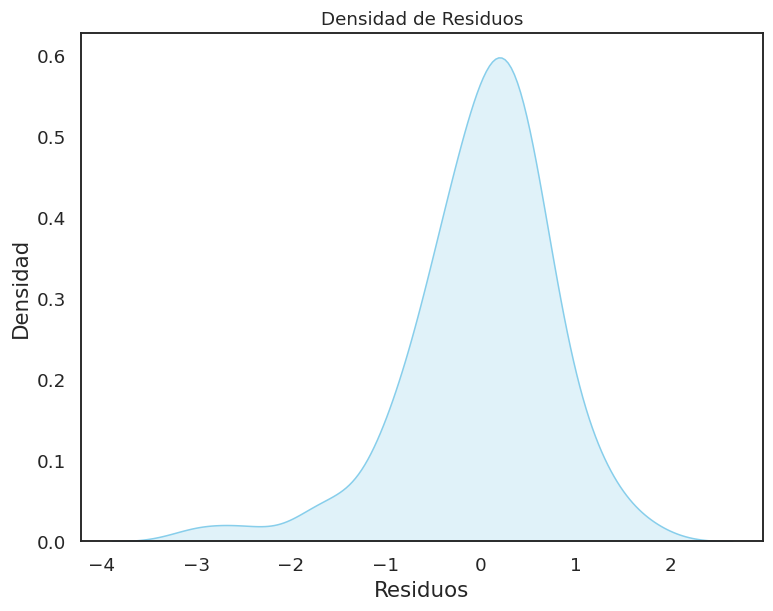

In [187]:
plt.figure(figsize=(8, 6))
sns.kdeplot(errors, color='skyblue', fill=True)
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.title('Densidad de Residuos')
plt.show()

### Varianza constante (Homocedasticidad)

La varianza en los errores debe mantenerse constante a medida que varia la variable objetivo.

![variance.png](attachment:variance.png)

<Axes: >

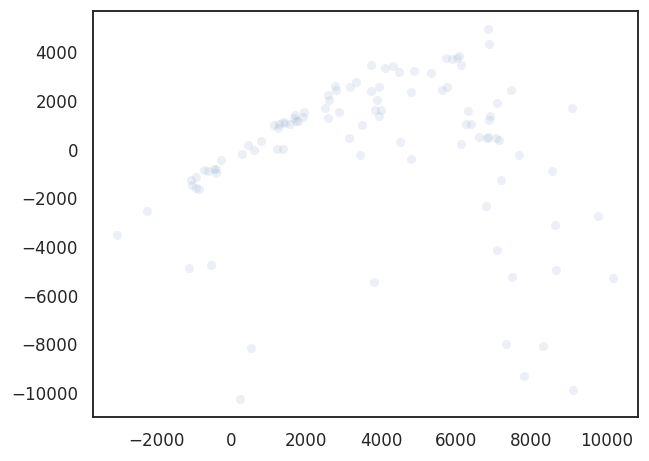

In [148]:
sns.scatterplot(x = pipeline.predict(X_train[features]), y=errors, alpha=0.1)

In [149]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train[features])))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test[features])))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train[features]))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test[features]))))

MAE:
Train: 2345.026352936887
Test: 2656.210220406387

RMSE:
Train: 3189.4276369639683
Test: 3524.5793844977525


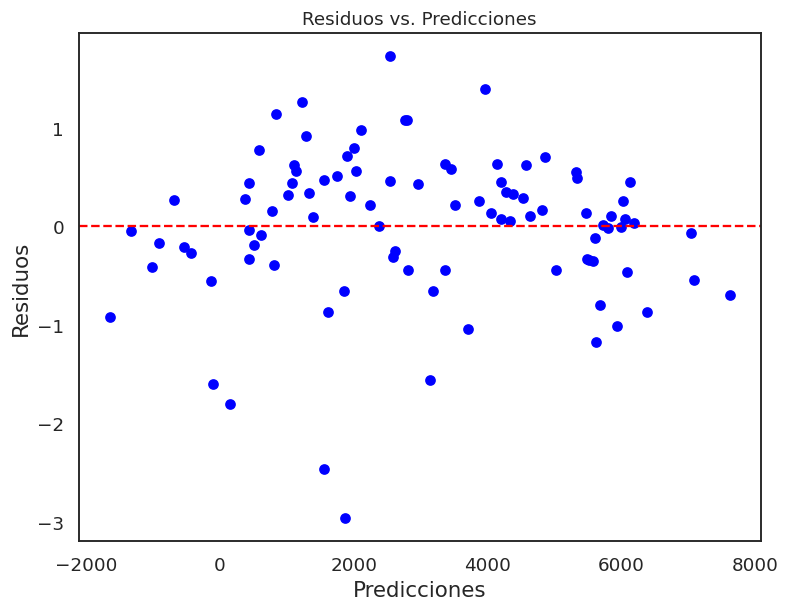

In [188]:
plt.figure(figsize=(8, 6))
plt.scatter(pipeline.predict(X_train), errors, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs. Predicciones')
plt.show()


# **Conclusión.**
Cada modelo presenta una manera de ajustar los datos con las variables explicativas escogidas, sin embargo, notamos una gran mejora al generar modelos con transformación logarítmica
